# Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Load the dataset

creditcard_df = pd.read_csv("Marketing_data.csv")

In [3]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


The data represents a dataset with 8950 rows and 18 columns. Here's a short description of each column:

| Column                               | Description                                                                           |
|--------------------------------------|---------------------------------------------------------------------------------------|
| CUST_ID                              | Customer ID, a unique identifier for each customer.                                   |
| BALANCE                              | The current balance amount in the customer's account.                                 |
| BALANCE_FREQUENCY                    | How frequently the balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated).|
| PURCHASES                            | Total amount of purchases made by the customer.                                        |
| ONEOFF_PURCHASES                     | Total amount of one-off purchases made by the customer.                                |
| INSTALLMENTS_PURCHASES               | Total amount of purchases made in installments by the customer.                        |
| CASH_ADVANCE                         | Total amount of cash advances taken by the customer.                                   |
| PURCHASES_FREQUENCY                  | How frequently the purchases are made, represented as a ratio (1 = frequently updated, 0 = not frequently updated).|
| ONEOFF_PURCHASES_FREQUENCY           | How frequently one-off purchases are made, represented as a ratio (1 = frequently updated, 0 = not frequently updated).|
| PURCHASES_INSTALLMENTS_FREQUENCY    | How frequently purchases in installments are made, represented as a ratio.            |
| CASH_ADVANCE_FREQUENCY              | How frequently cash advances are taken, represented as a ratio (1 = frequently updated, 0 = not frequently updated).|
| CASH_ADVANCE_TRX                    | Number of transactions made with cash advances.                                        |
| PURCHASES_TRX                       | Number of purchase transactions.                                                       |
| CREDIT_LIMIT                        | Credit limit for the customer.                                                         |
| PAYMENTS                            | Total amount of payments done by the customer.                                         |
| MINIMUM_PAYMENTS                    | Minimum amount of payments required from the customer.                                 |
| PRC_FULL_PAYMENT                    | Percentage of full payment made by the customer.                                        |
| TENURE                              | Number of months the customer has been with the company.                               |


In [4]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Key highlights:

- Mean balance: $1564
- Balance Fequency is frequently updated on average of 0.9 which is considerably high.
- Purchase average is $1000.
- One-off purchase average is $600.
- Average purchase frequency is 0.5.
- Average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY and CASH_ADVANCE_FREQUENCY are genrally low.
- Average credit limit is $4500.
- Percent of full apyment is 15%.
- Average tenure is 11 years.

In [6]:
# Let's see who made the one_off purchase of $40761.

creditcard_df[creditcard_df["ONEOFF_PURCHASES"] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


Key highlights:

- BALANCE: This customer has a balance of $11547.52, looks like the person comes from an extremely well-do background.
- PURCHASES: This customer has made purchases totaling $49039.57, with a large single purchase of $40761.25, it's huge.
- PURCHASES_FREQUENCY: The purchases made by this customer are very frequent, with a score of 1.0. That means this is a regular customer.
- PURCHASES_TRX: The number of purchase transactions made by this customer is very high, with a total of 101 transactions where the average purcahse is just 14.
- CREDIT_LIMIT: The credit limit for this customer is $22500.0, way higher than the average.
- PAYMENTS: Total payments made by this customer amount to $46930.60.

In [7]:
# Let's see who made the cash advance of $47137.211760.

creditcard_df[creditcard_df["CASH_ADVANCE"] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


Key highlights: 

- BALANCE: The customer's balance of $10905.05 is much higher than the average balance of approximately $1564.47, indicating a relatively wealthy individual.
- PURCHASES: This customer's total purchases of $431.93 are notably lower than the average purchases of approximately $1003.20, suggesting moderate spending behavior.
- CASH_ADVANCE: The cash advances taken by this customer amount to $47137.21, which is significantly higher than the average cash advance amount of approximately $978.87, indicating heavy reliance on cash advances.
- PURCHASES_FREQUENCY: This customer's purchase frequency score of 0.583333 is slightly below the average purchase frequency score of approximately 0.490351.
- CASH_ADVANCE_FREQUENCY: With a cash advance frequency score of 1.0, this customer frequently takes cash advances compared to the average cash advance frequency score of approximately 0.135144.
- CASH_ADVANCE_TRX: The customer's 123 transactions with cash advances significantly surpass the average cash advance transactions of approximately 3.25.
- CREDIT_LIMIT: The customer's credit limit of $19600.0 is higher than the average credit limit of approximately $4494.45.
- PAYMENTS: Total payments made by this customer amount to $39048.60, significantly higher than the average payments of approximately $1733.14, showing a strong capacity for repayment.
- MINIMUM_PAYMENTS: The minimum payments required from this customer amount to $5394.17, which is notably higher than the average minimum payments of 864.
- PRC_FULL_PAYMENT: It seems like this person never paid credit card in full (0.0) while the average is 0.15.

# Data Visualisation and Data Exploration

<Axes: >

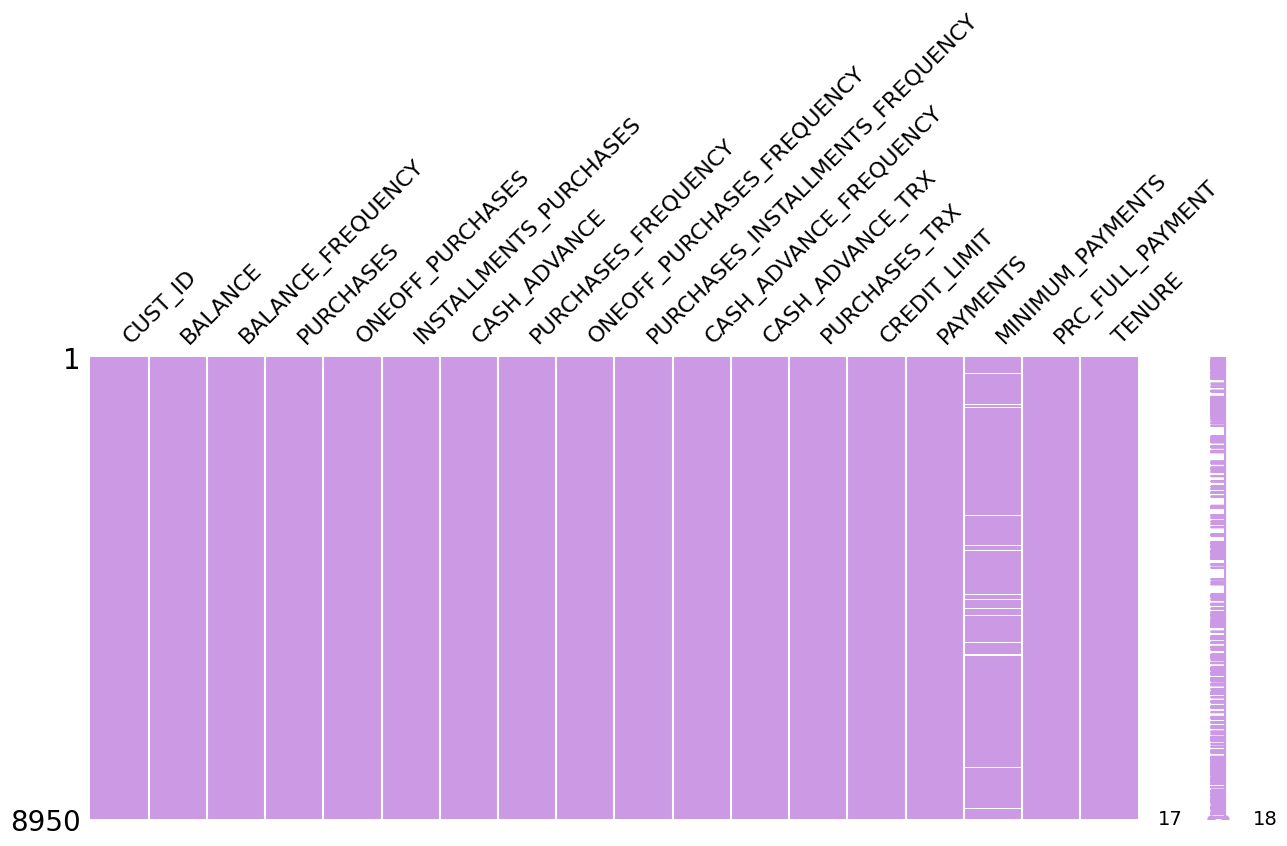

In [8]:
# Let's check for missing values.

import missingno as msno
%matplotlib inline
msno.matrix(creditcard_df, figsize = (15,6), color= (0.8, 0.6, 0.9))

In [9]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Key highlights:

- CREDIT_LIMIT: There is 1 missing value in the 'CREDIT_LIMIT' column.
- MINIMUM_PAYMENTS: There are 313 missing values in the 'MINIMUM_PAYMENTS' column.
- All the rest of the columns have no missing values.

In [10]:
# Fill up the missing entries with the mean of the 'MINIMUM_PAYMENT'.

creditcard_df.loc[
    (creditcard_df["MINIMUM_PAYMENTS"].isnull() == True), "MINIMUM_PAYMENTS"
] = creditcard_df["MINIMUM_PAYMENTS"].mean()

In [11]:
# Fill up the missing entries with the mean of the 'CREDIT_LIMIT'.

creditcard_df.loc[(creditcard_df["CREDIT_LIMIT"].isnull() == True), "CREDIT_LIMIT"] = (
    creditcard_df["CREDIT_LIMIT"].mean()
)

In [12]:
# Making sure all the missing values are gone.

creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# Check for duplicate values.

creditcard_df.duplicated().sum()

0

In [14]:
# Drop Customer ID since it has no use here.

creditcard_df.drop("CUST_ID", axis=1, inplace=True)

In [15]:
# Check and make sure its gone.

creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/tmp/ipykernel_18304/3603567489.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_18304/3603567489.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


/tmp/ipykernel_18304/3603567489.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_18304/3603567489.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipykernel_18304/3603567489.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.

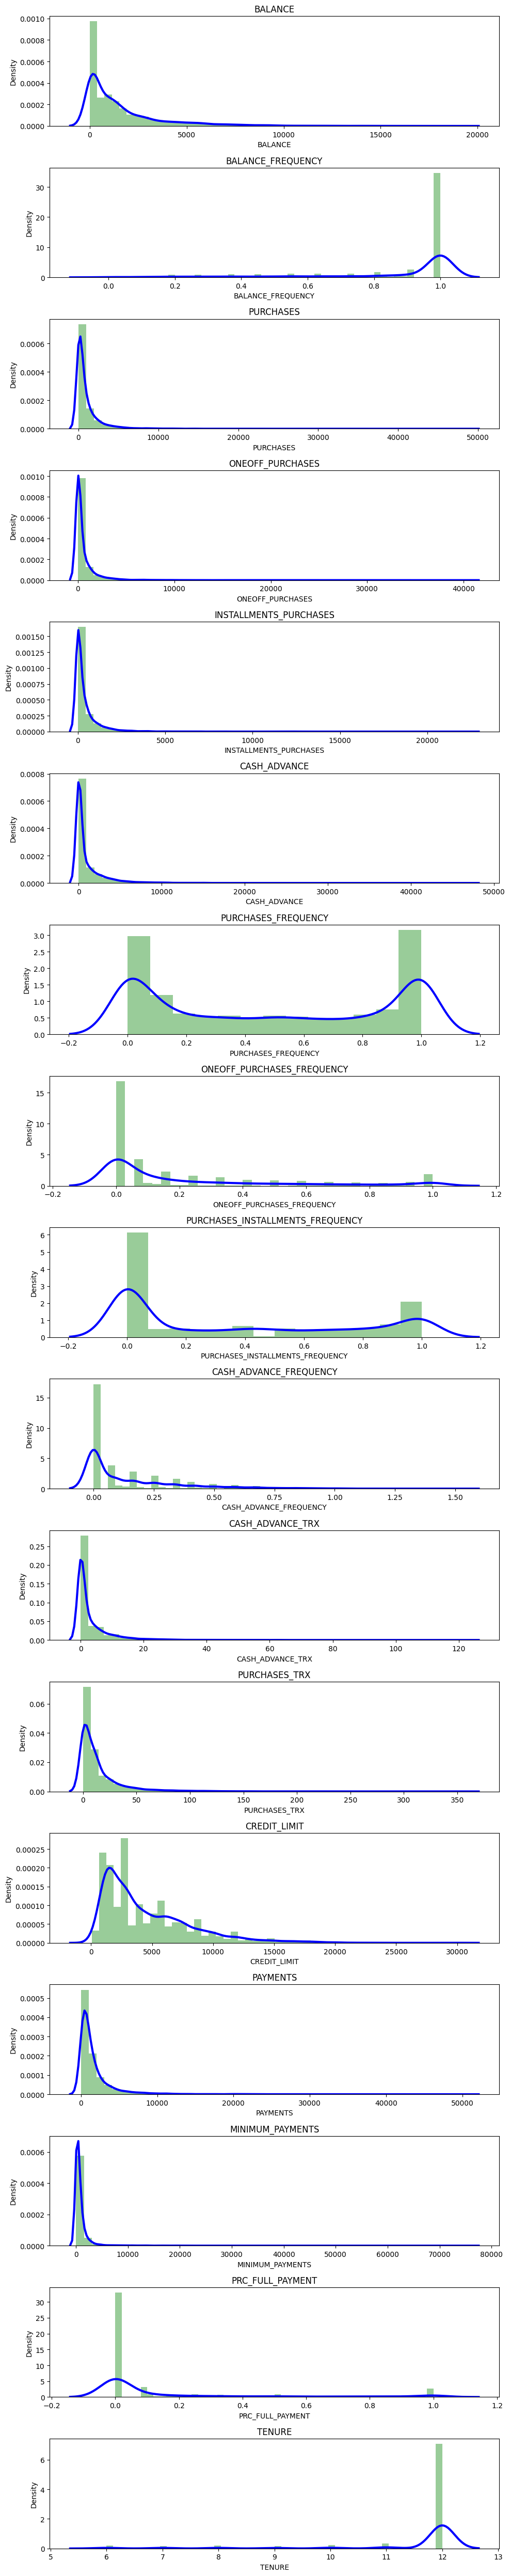

In [17]:
# distplot combines teh matplotlib.hist function with seaborn kdeplot().
# Kernel Density Plot (KDE) plot visualises Probability Density of a continuous variable.

plt.figure(figsize=(10, 50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.distplot(
        creditcard_df[creditcard_df.columns[i]],
        kde_kws={"color": "b", "lw": 3, "label": "KDE"},
        hist_kws={"color": "g"},
    )
    plt.title(creditcard_df.columns[i])
plt.tight_layout()

Highlights for the distplots:

- Mean Balance is $1500.
- 'BALANCE_FREQUENCY' for most customers is updated frequently ~1.
- For PURCHASES_FREQUENCY, there are two distinct group of customers.
- For ONE_OFF_PURCHASES and PURCHASE_INSTALLMENT_FREQUENCY, Most users don't do one off purchases or installment purchases frequently.
- Very small number of customers pay their balance full as shown in PRC_FULL_PAYMENTS.
- Credit Limit average is around $4500.
- Most customers have a tenure of 12 years.
- Only about 1% of the customers pay full payment.

<Axes: >

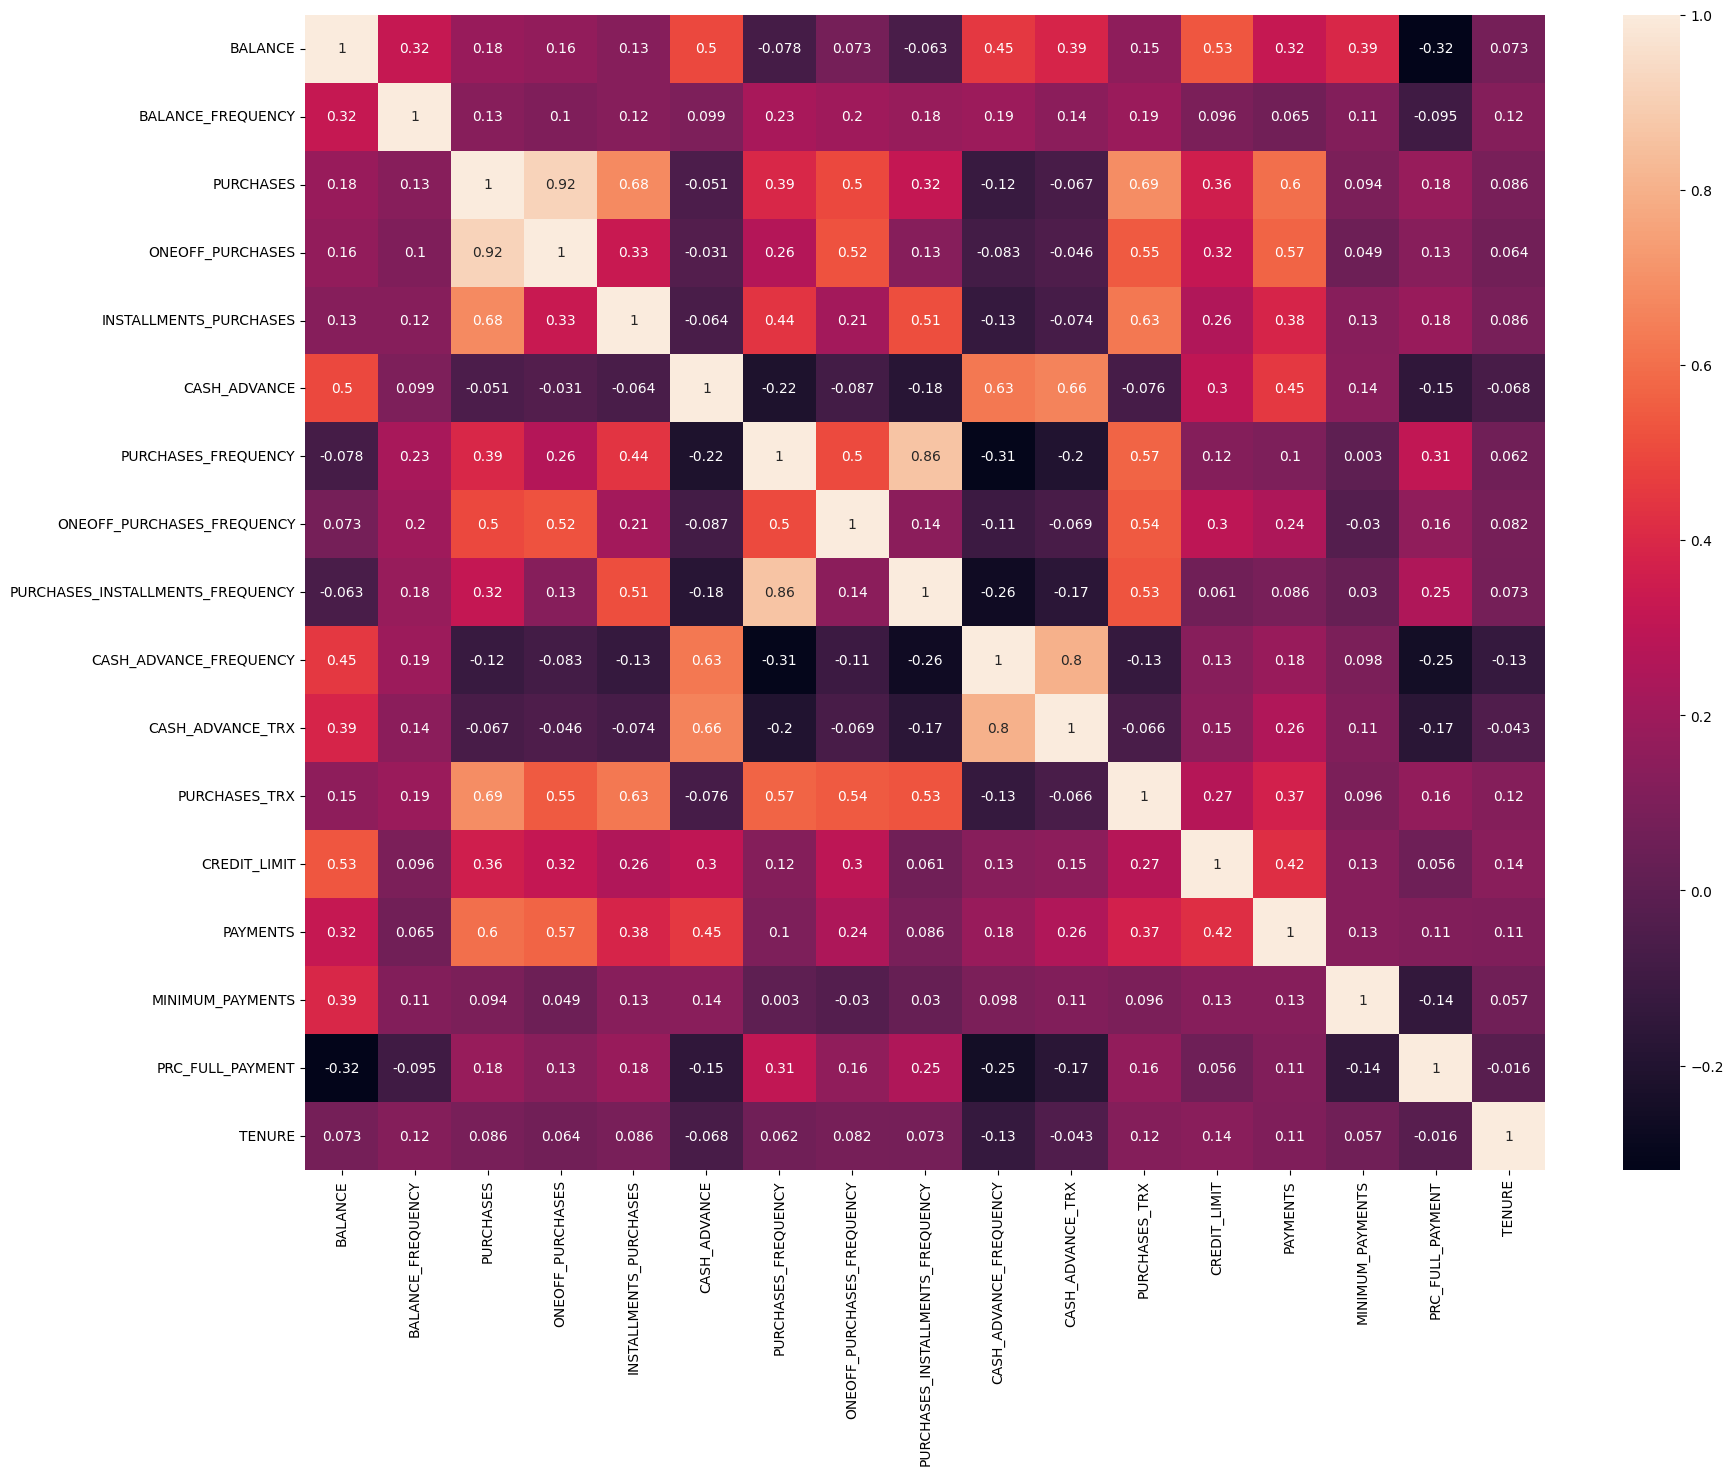

In [18]:
# Create a correlation heatmap of theb attributes.

correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(correlations, annot=True)

Key highlights:

- Strong positive correlation between purchases and one off purchases.
- Strong positive correlation between installment purchases and purchases.
- Strong positive correlation between installment frequency and purchases frequency.
- Strong positive correlation between purchases frequency and purchases intallment frequency.



# Find the optimal number of Clusters using Elbow Method

In [19]:
# Scale the Data

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [20]:
creditcard_df_scaled.shape

(8950, 17)

In [21]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [22]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(creditcard_df_scaled)
    scores_1.append(kmeans.inertia_)

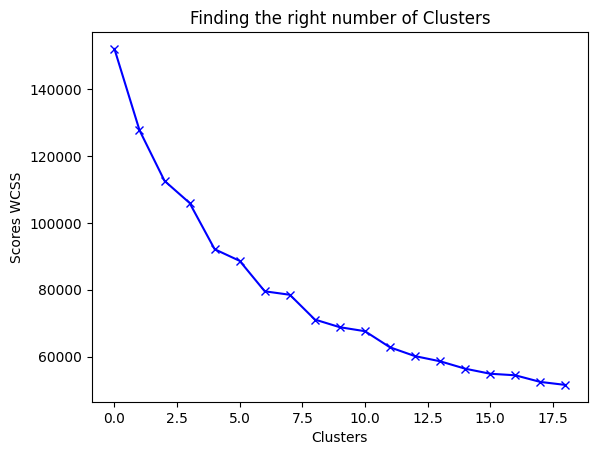

In [23]:
plt.plot(scores_1, "bx-")
plt.title("Finding the right number of Clusters")
plt.xlabel("Clusters")
plt.ylabel("Scores WCSS")
plt.show()

Key highlights:

- From this, we can see that the 8th Cluster seems to be forming the elbow of the curve.
- However, the value do not reduce linearly until 8th cluster

So, we will change the number of clusters from 7.


# Apply K-Means Clustering Methods

In [24]:
# Taking the number fo Clusters as 8.

kmeans = KMeans(8, random_state=42)

# Fit the model
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

kmeans.cluster_centers_.shape

(8, 17)

In [25]:
# Making data frame for our clusters.

cluster_centres = pd.DataFrame(
    data=kmeans.cluster_centers_, columns=[creditcard_df.columns]
)
cluster_centres

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2.058233,0.380125,-0.008668,-0.018266,0.012715,3.443464,-0.166359,0.000556,-0.114164,2.464589,3.214804,0.038914,1.388970,2.012618,0.571945,-0.287571,0.036356
1,-0.697312,-2.143216,-0.315217,-0.234345,-0.314691,-0.311810,-0.559017,-0.424876,-0.459982,-0.483072,-0.366196,-0.425994,-0.210357,-0.226025,-0.255247,0.264202,-0.176963
2,-0.423285,0.306369,-0.059228,-0.245620,0.311194,-0.377428,1.006329,-0.378927,1.188022,-0.481567,-0.370117,0.137881,-0.332000,-0.254585,-0.127285,0.402403,-0.042480
3,0.930844,0.337142,-0.339787,-0.243746,-0.355650,0.950975,-0.732450,-0.361609,-0.635260,1.445542,0.994548,-0.430999,0.394792,0.086235,0.159508,-0.431688,-0.283473
4,1.374491,0.412070,7.177493,6.384202,5.239545,0.016050,1.082454,1.917512,1.031769,-0.290144,-0.107898,4.786628,2.181050,4.962364,0.709040,0.864673,0.332658
5,0.164517,0.429473,0.940910,0.887776,0.593733,-0.297602,1.099708,1.847568,0.564352,-0.393199,-0.307858,1.198653,0.719818,0.392337,-0.040770,0.432402,0.276054
6,1.210379,0.466916,0.002326,-0.286478,0.530986,-0.040978,0.064311,-0.558459,0.305943,-0.260594,-0.091820,0.196738,-0.058635,-0.083957,10.408907,-0.525551,0.294258
7,-0.136799,0.373512,-0.320844,-0.201091,-0.389067,-0.233015,-0.739663,-0.281685,-0.722615,-0.134223,-0.197983,-0.443459,-0.397414,-0.294149,-0.092992,-0.445219,0.100819


In [26]:
# Perfrom Inverse transformation

cluster_centres = scaler.inverse_transform(cluster_centres)
cluster_centres = pd.DataFrame(data=cluster_centres, columns=[creditcard_df.columns])

cluster_centres.round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,5848.51,0.97,984.69,562.12,422.57,8199.98,0.42,0.20,0.32,0.63,25.19,15.68,9548.09,7559.48,2197.10,0.07,11.57
1,113.08,0.37,329.74,203.47,126.50,324.99,0.27,0.08,0.18,0.04,0.75,4.12,3729.09,1078.82,269.36,0.23,11.28
2,683.44,0.95,876.66,184.76,692.48,187.39,0.89,0.09,0.84,0.04,0.72,18.14,3286.50,996.14,567.57,0.27,11.46
3,3501.95,0.96,277.24,187.87,89.46,2973.11,0.20,0.09,0.11,0.42,10.04,4.00,5930.86,1982.79,1235.93,0.03,11.14
4,4425.36,0.97,16338.03,11188.91,5149.12,1012.53,0.92,0.77,0.77,0.08,2.51,133.69,12430.00,16098.70,2516.60,0.41,11.96
5,1906.90,0.98,3013.47,2065.96,947.97,354.79,0.93,0.75,0.59,0.06,1.15,44.50,7113.44,2868.92,769.19,0.28,11.89
6,4083.78,0.99,1008.17,116.94,891.23,892.94,0.52,0.04,0.49,0.08,2.62,19.60,4281.11,1490.10,25121.72,-0.00,11.91
7,1279.74,0.97,317.72,258.67,59.24,490.23,0.19,0.12,0.08,0.11,1.90,3.69,3048.49,881.61,647.49,0.02,11.65


- First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
- Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
- Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
- Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance

In [27]:
# Concatenate teh cluster labels to our original dataset.

creditcard_df_cluster = pd.concat(
    [creditcard_df, pd.DataFrame({"cluster": labels})], axis=1
)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,7
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,7


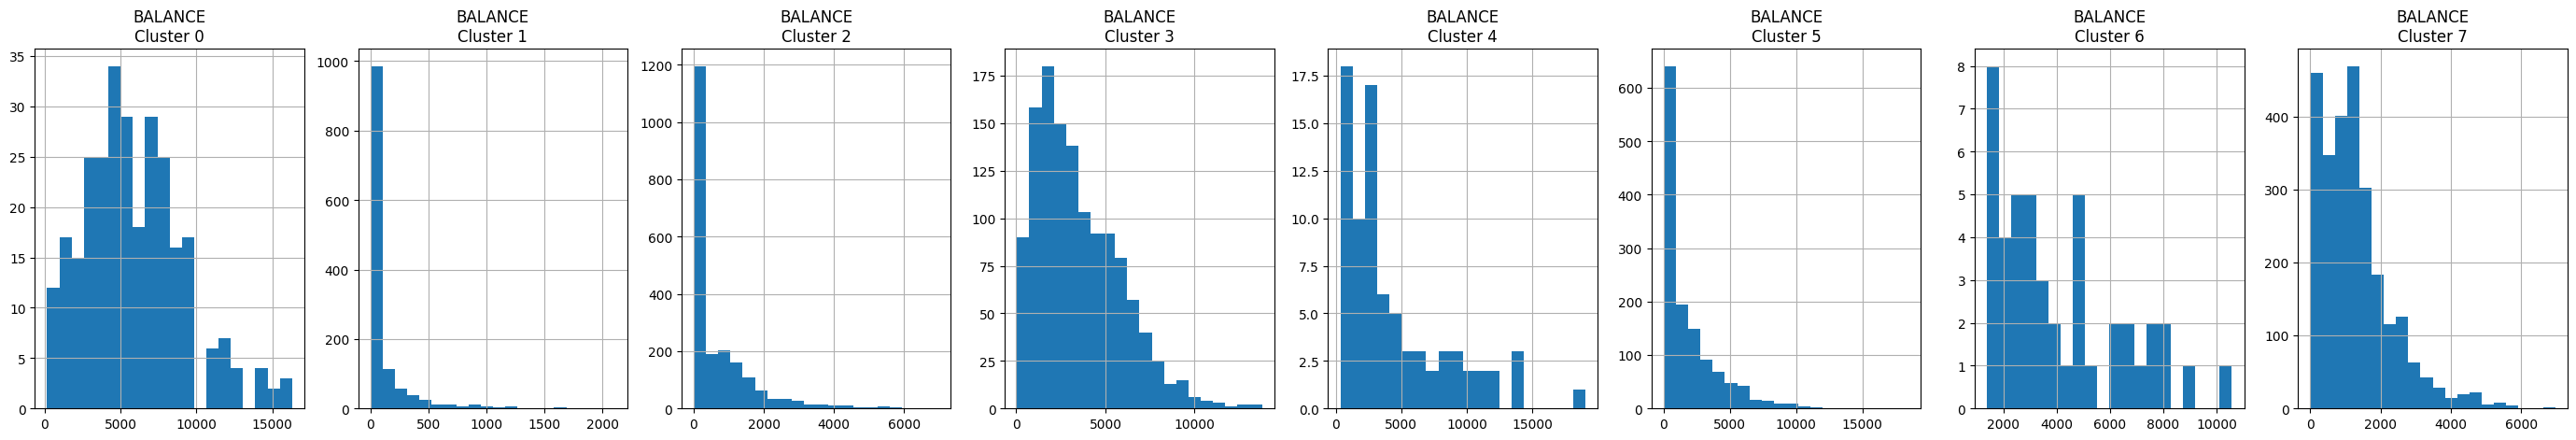

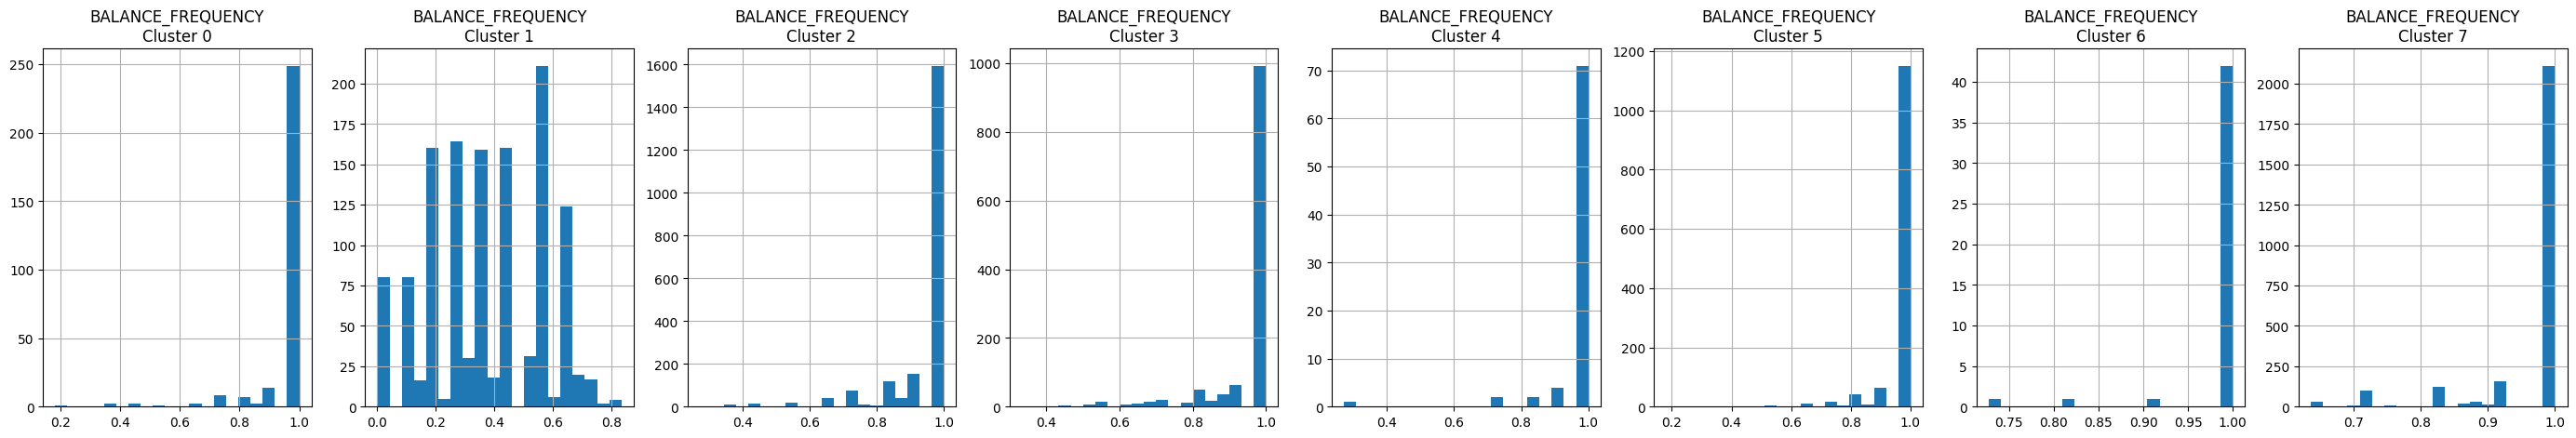

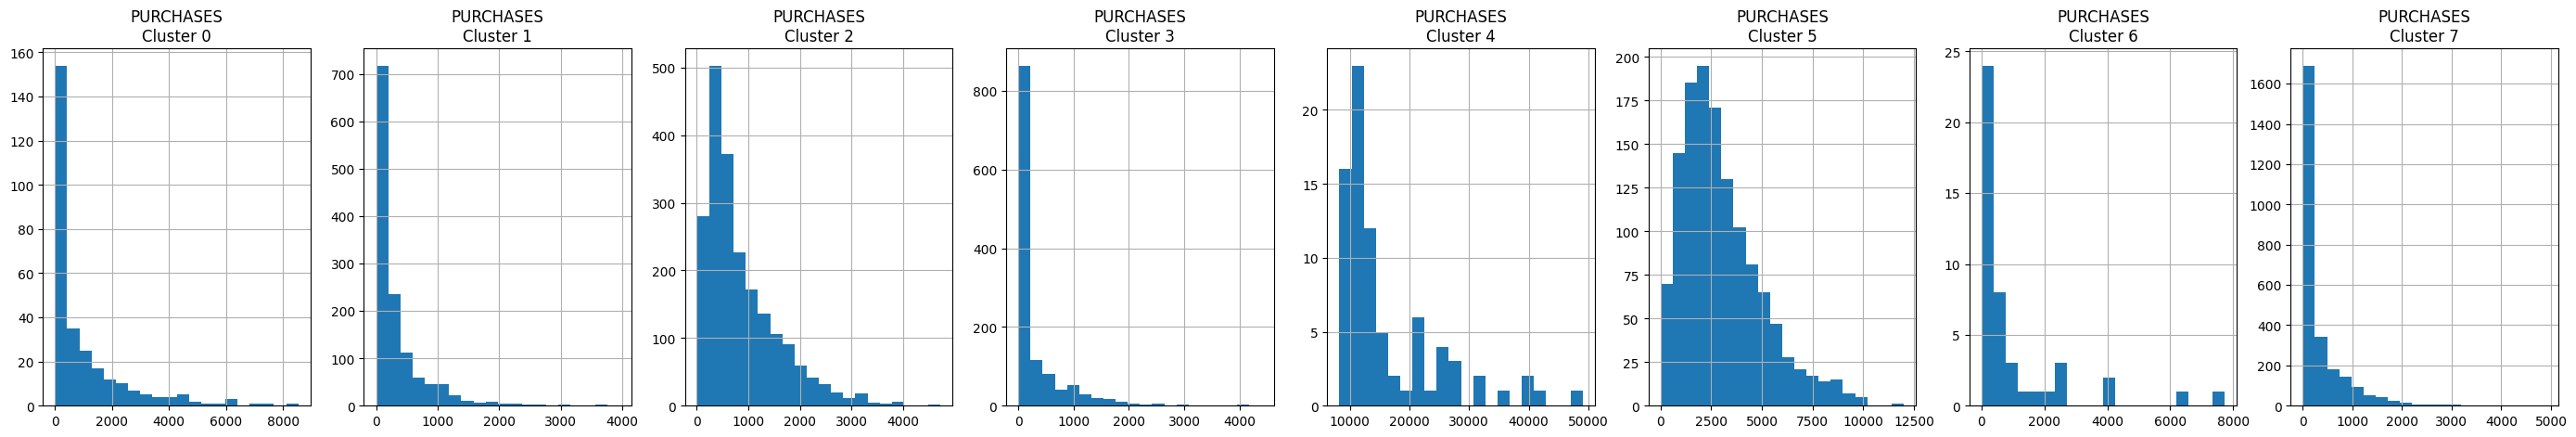

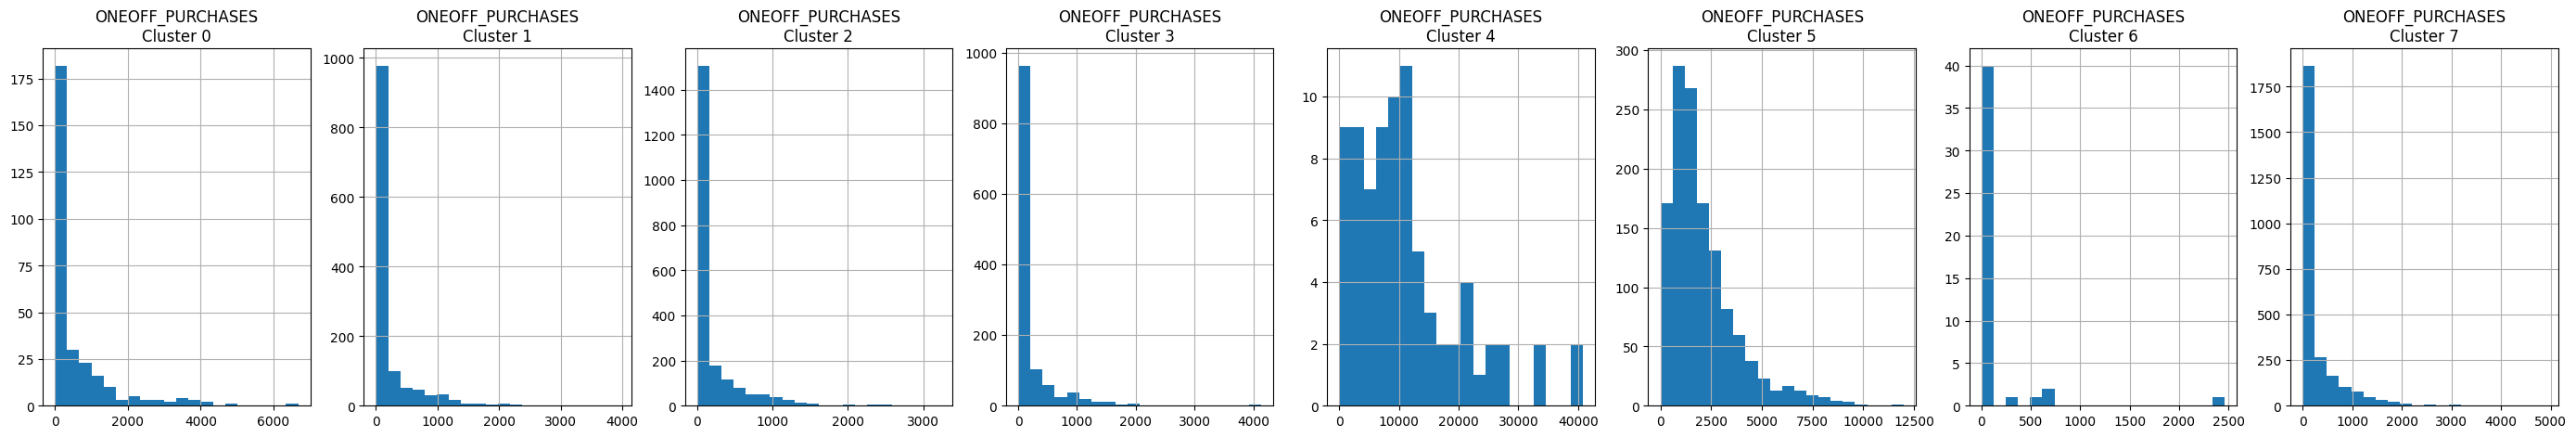

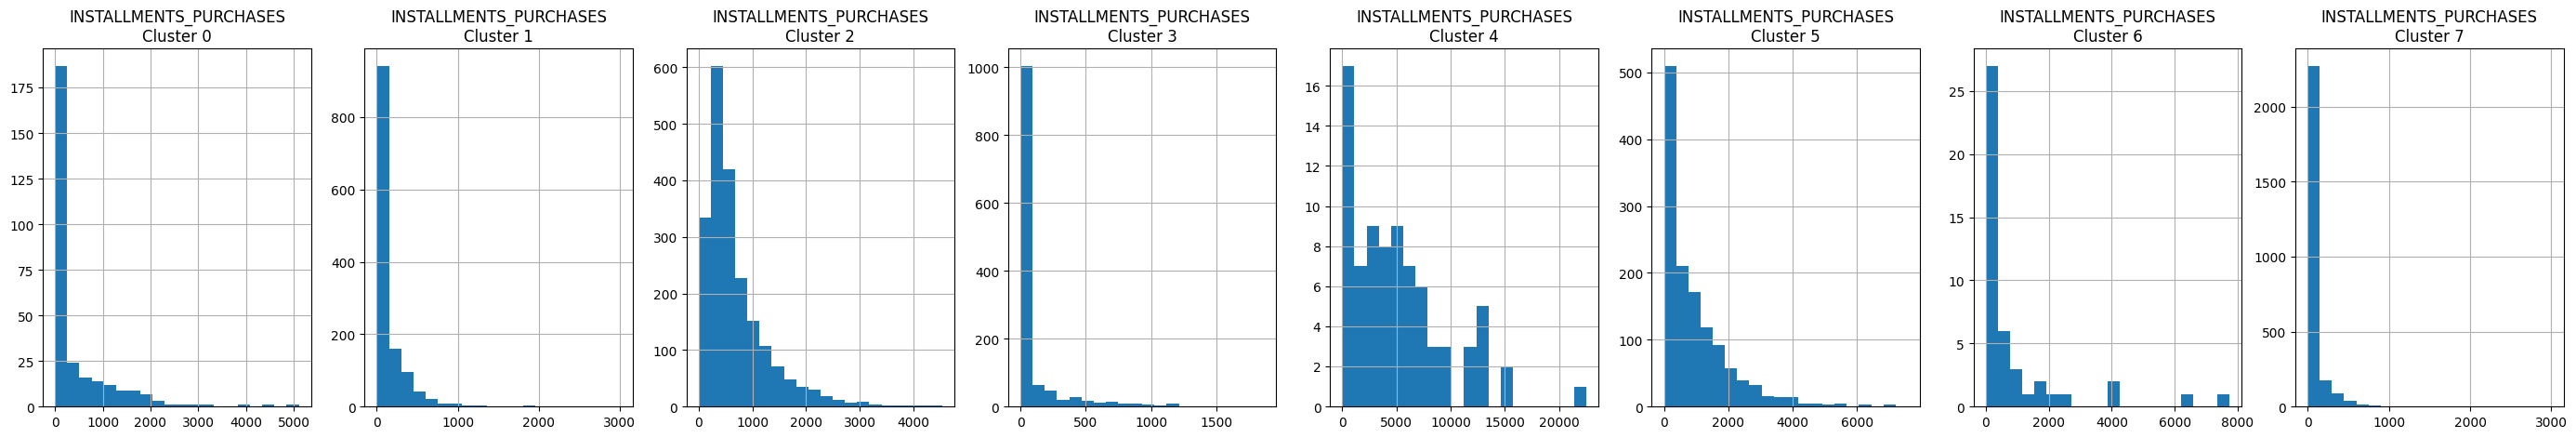

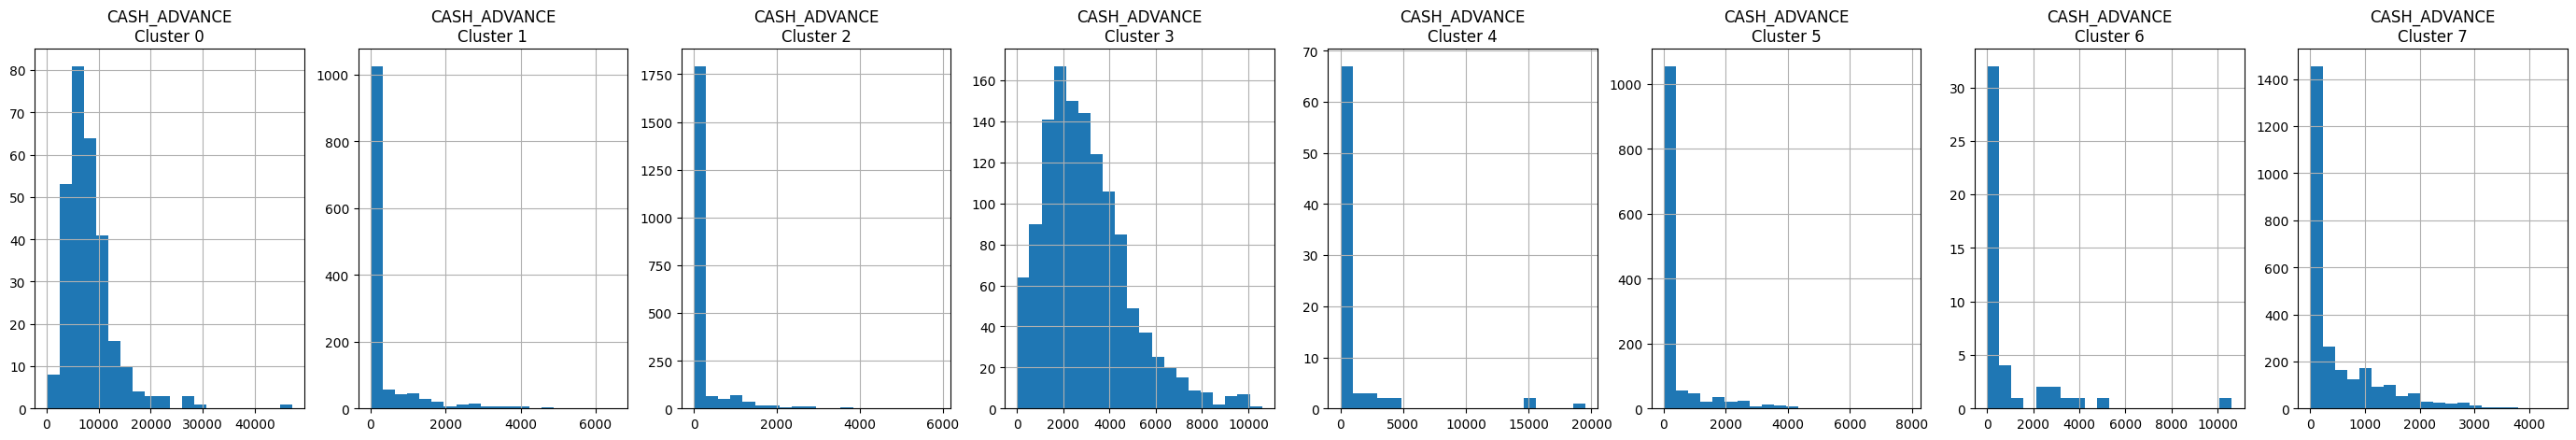

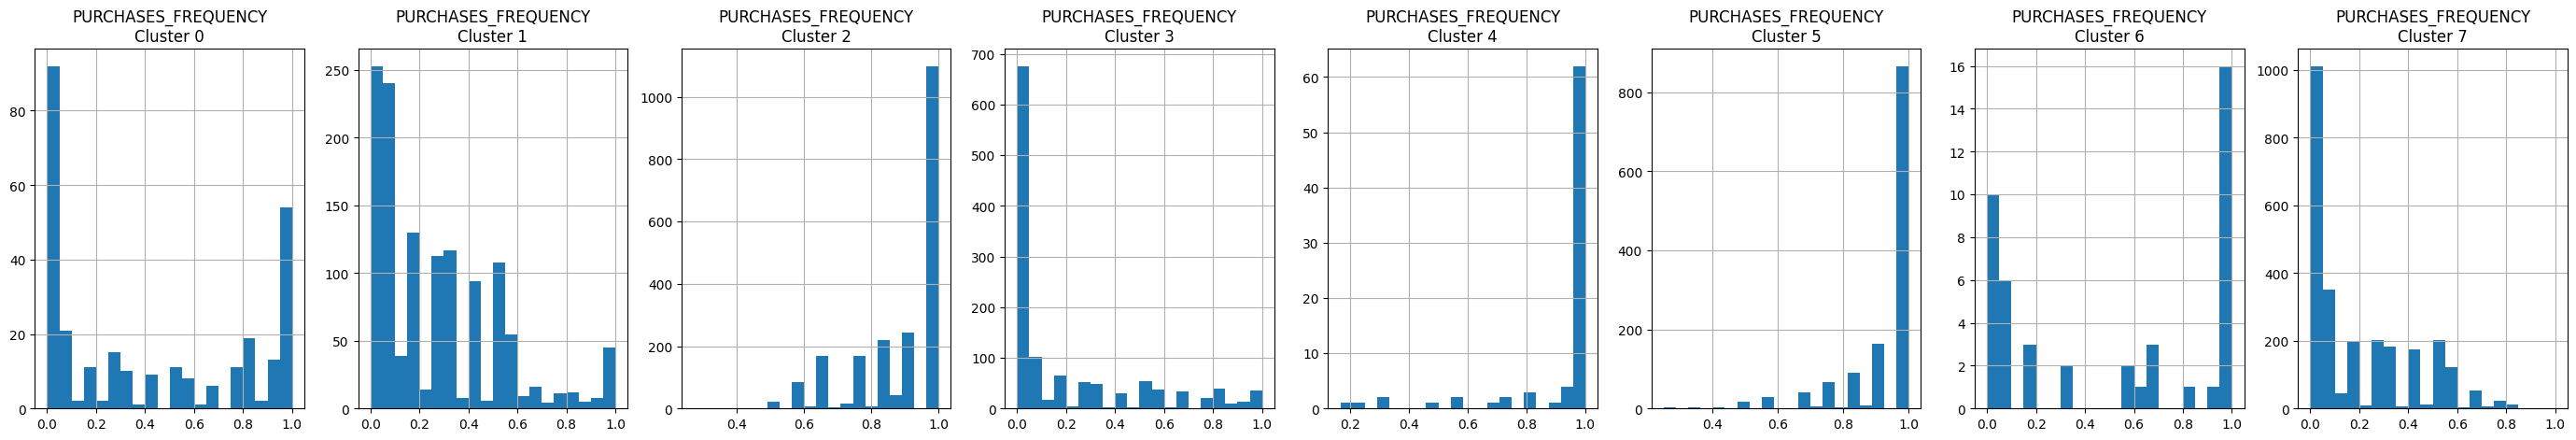

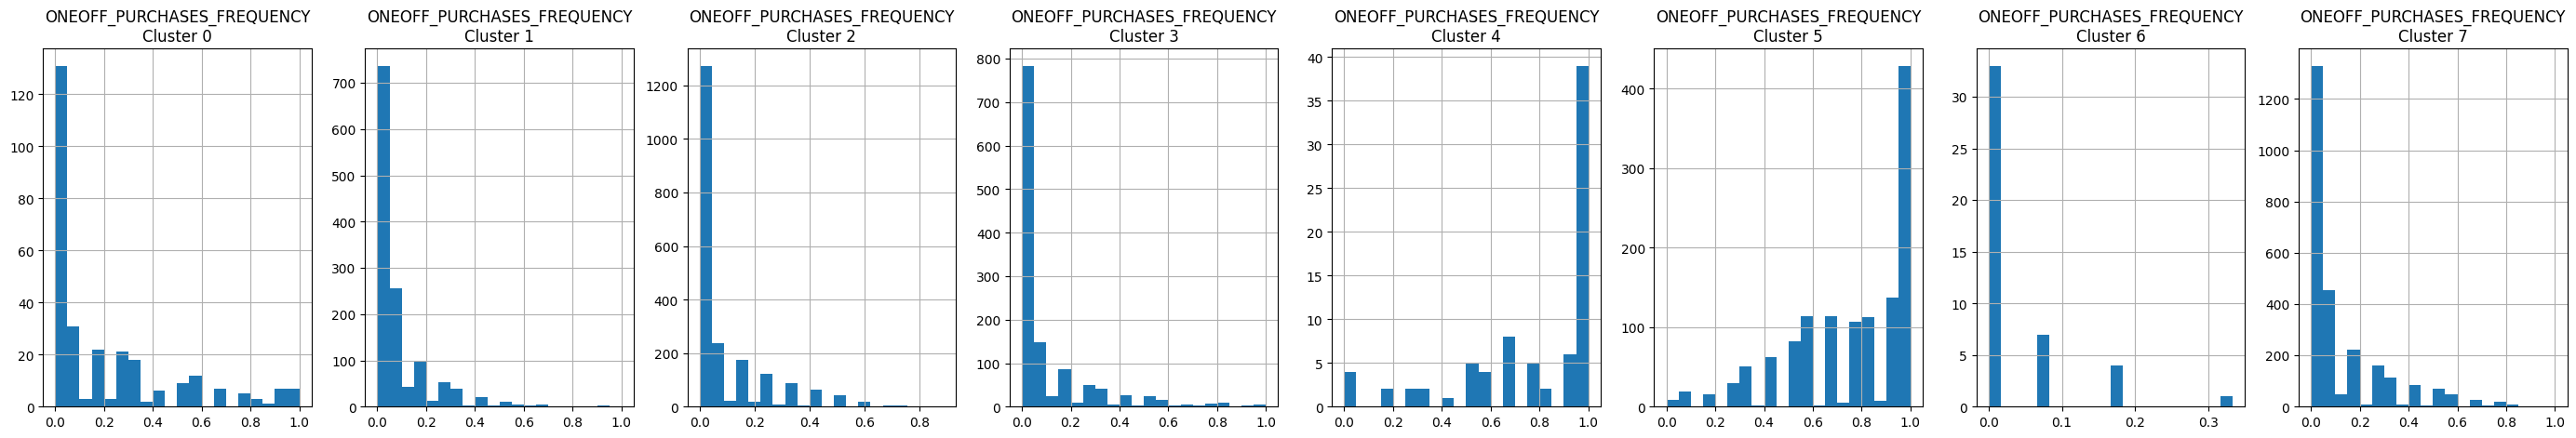

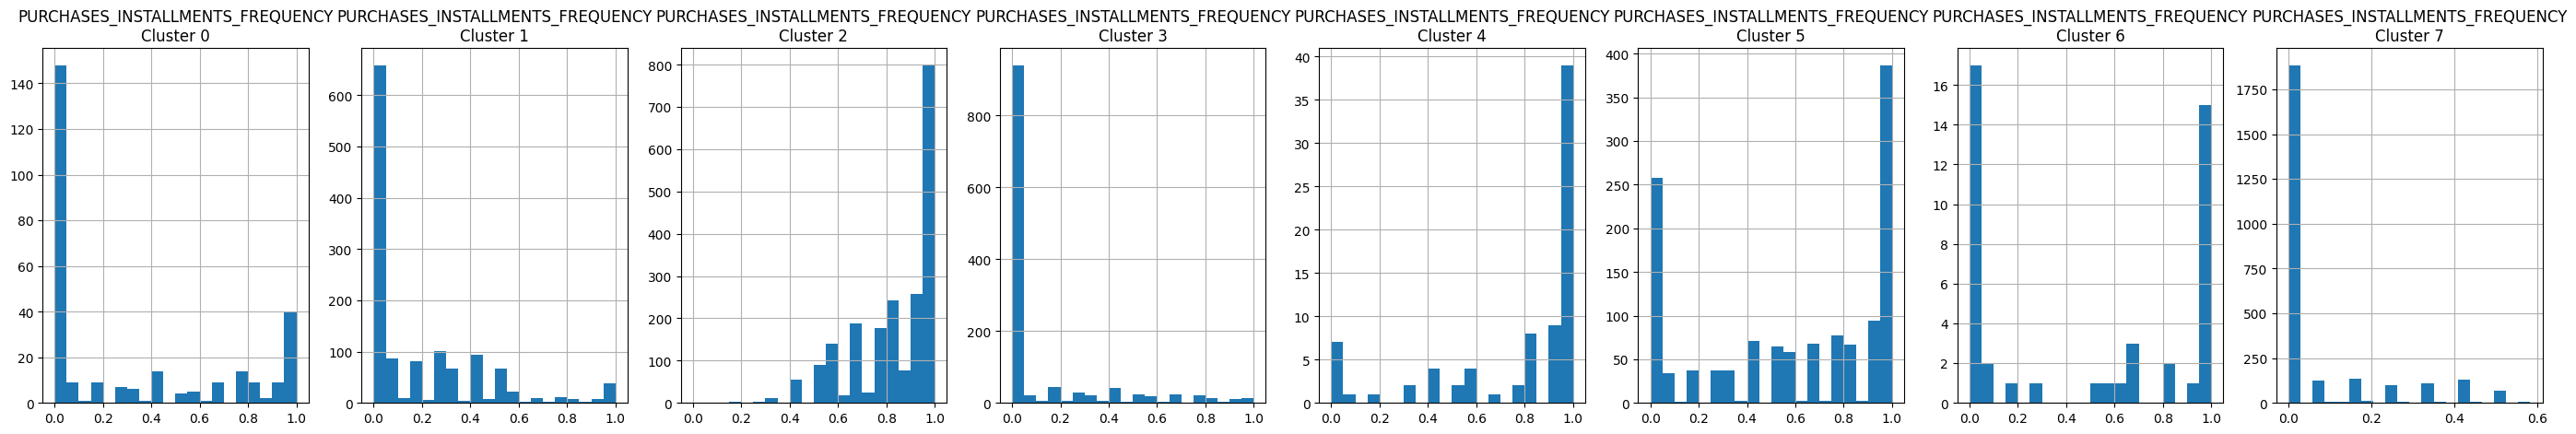

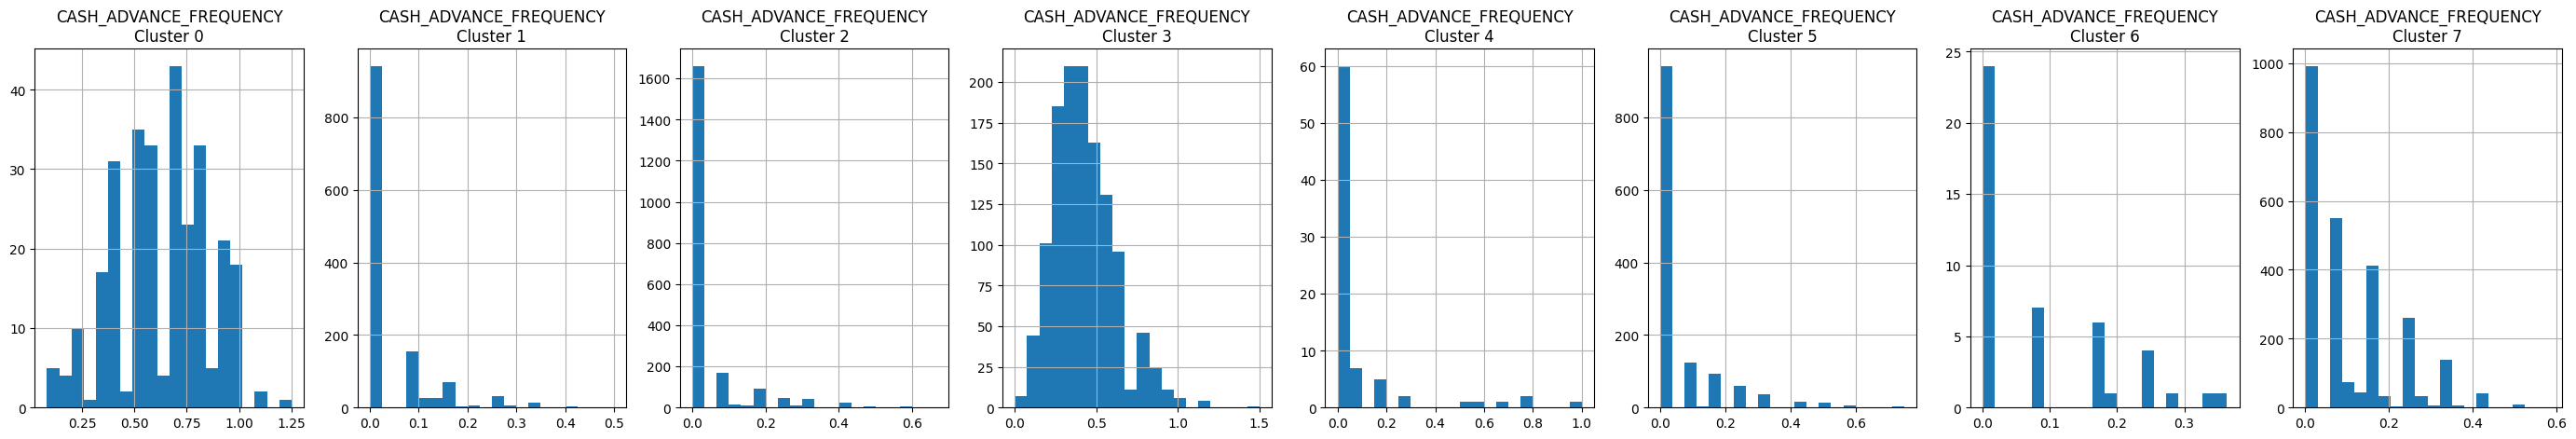

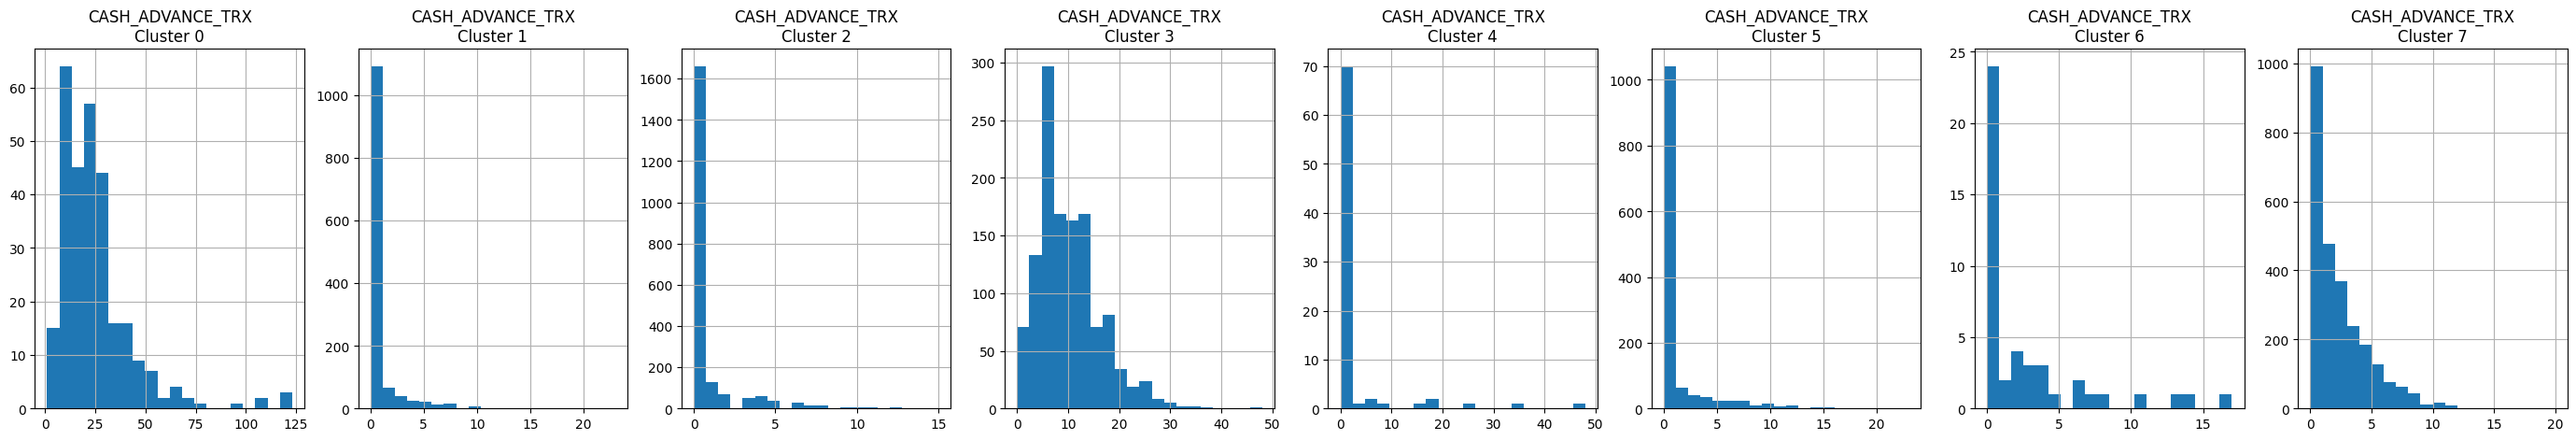

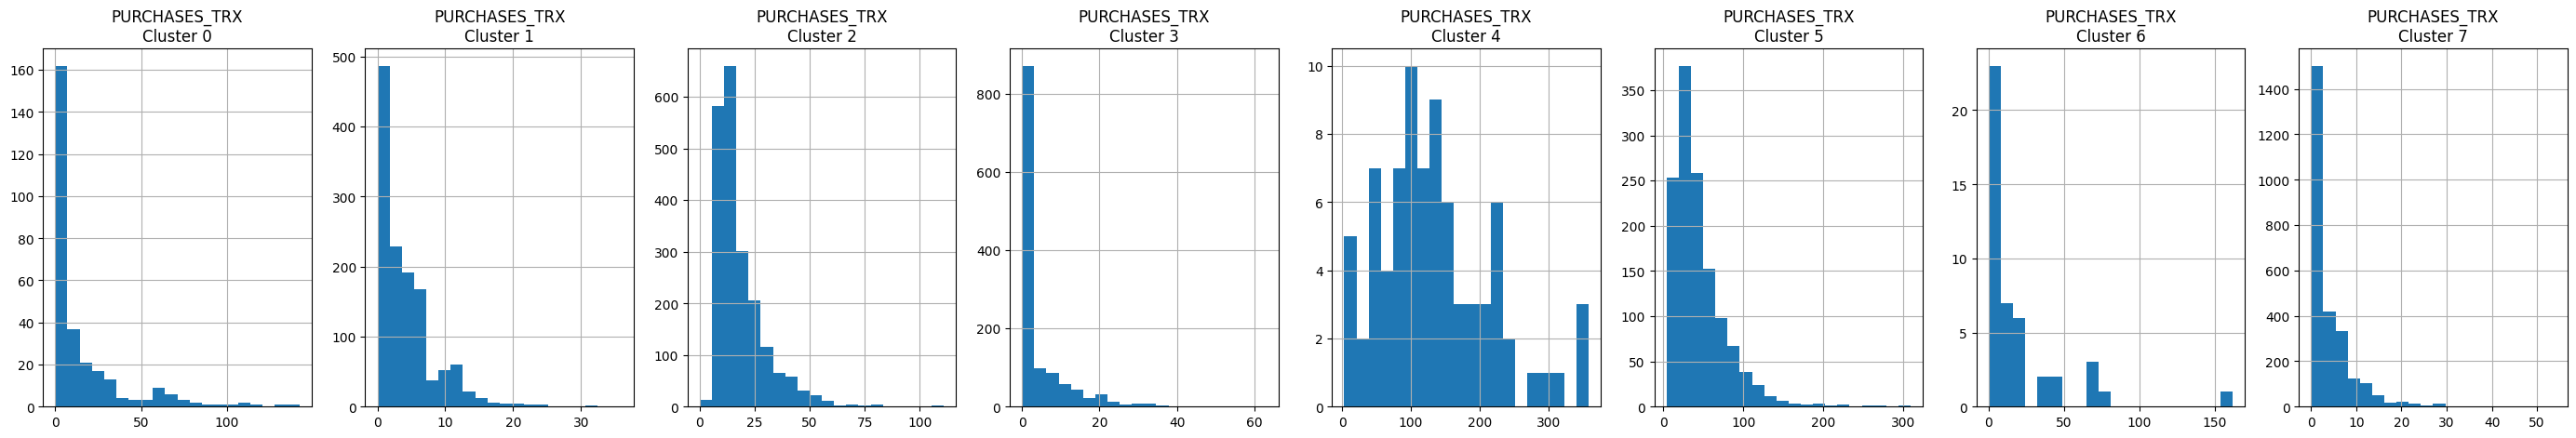

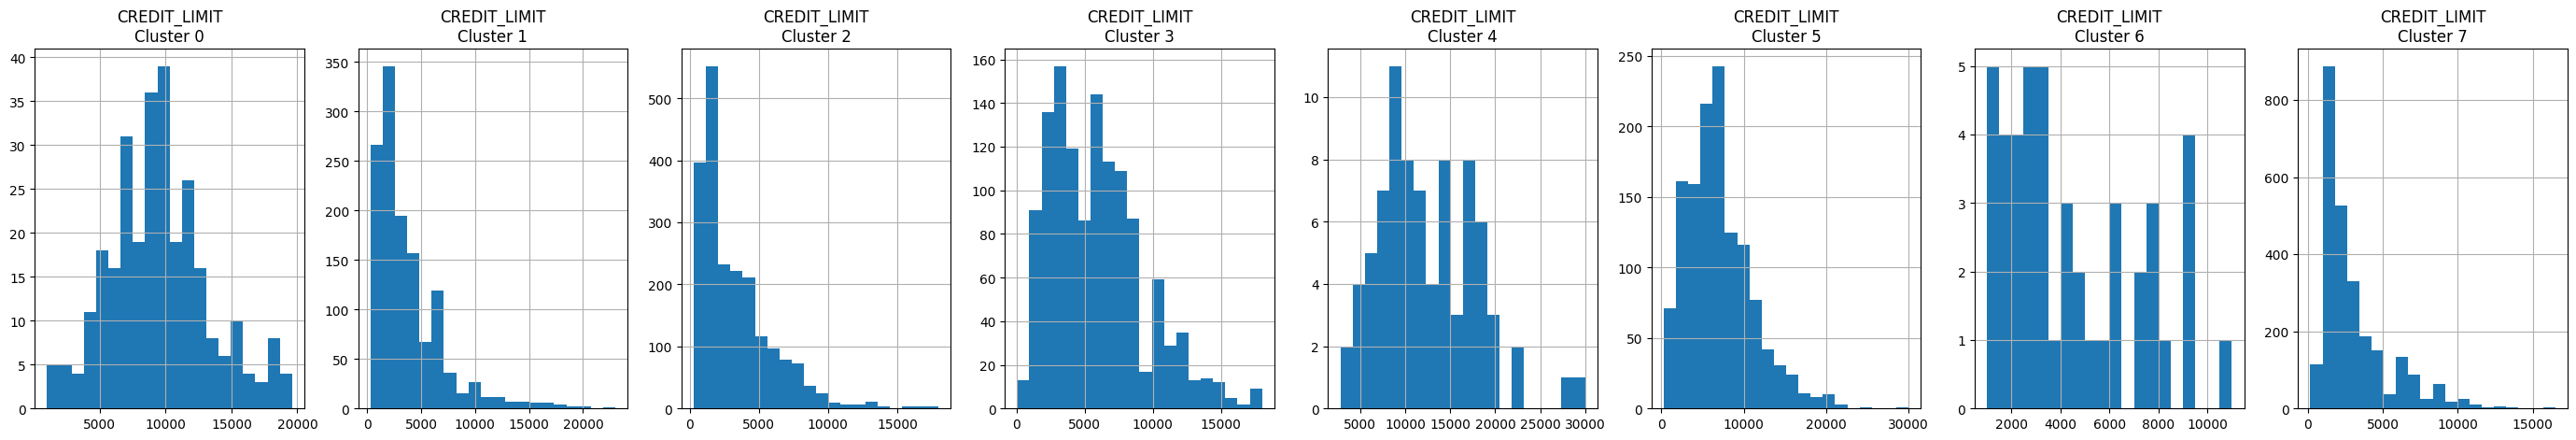

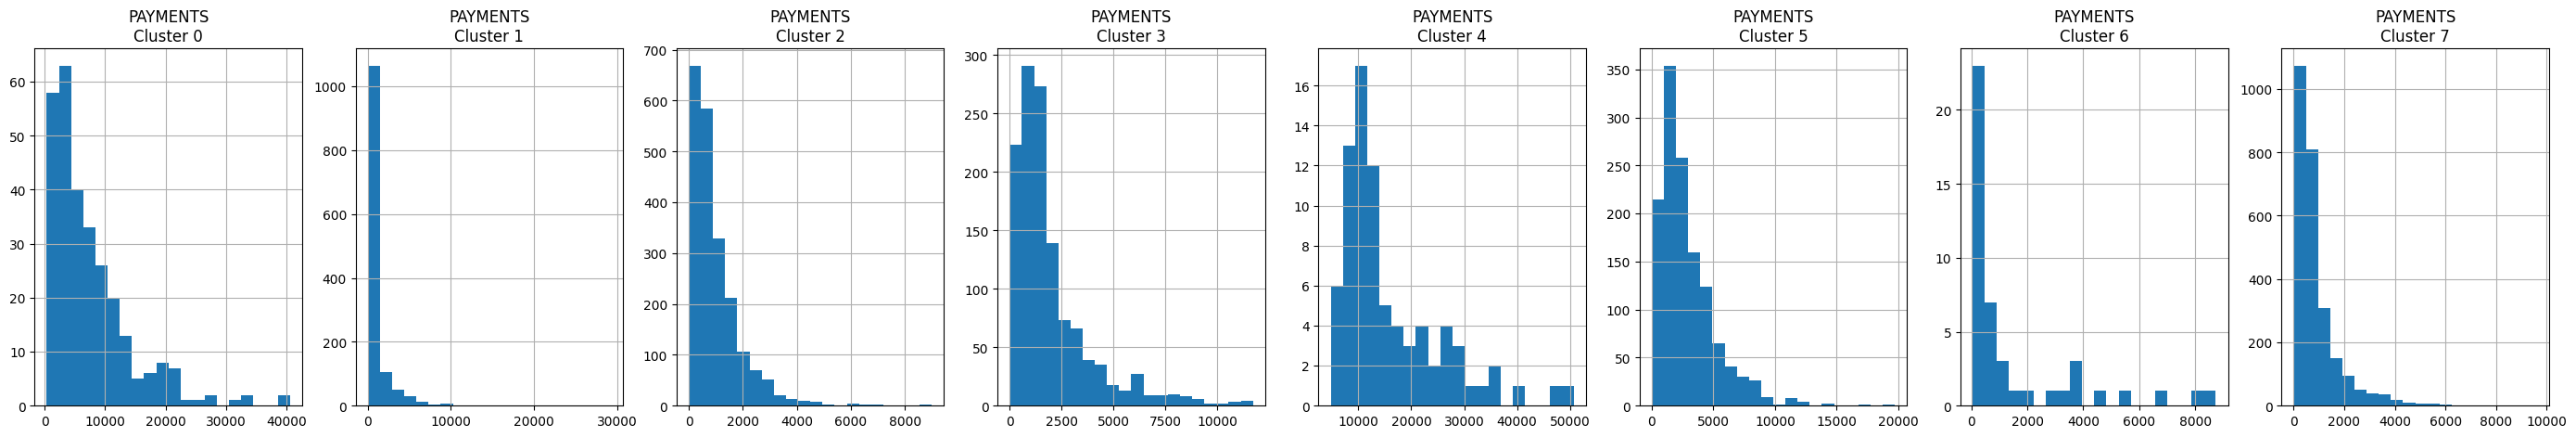

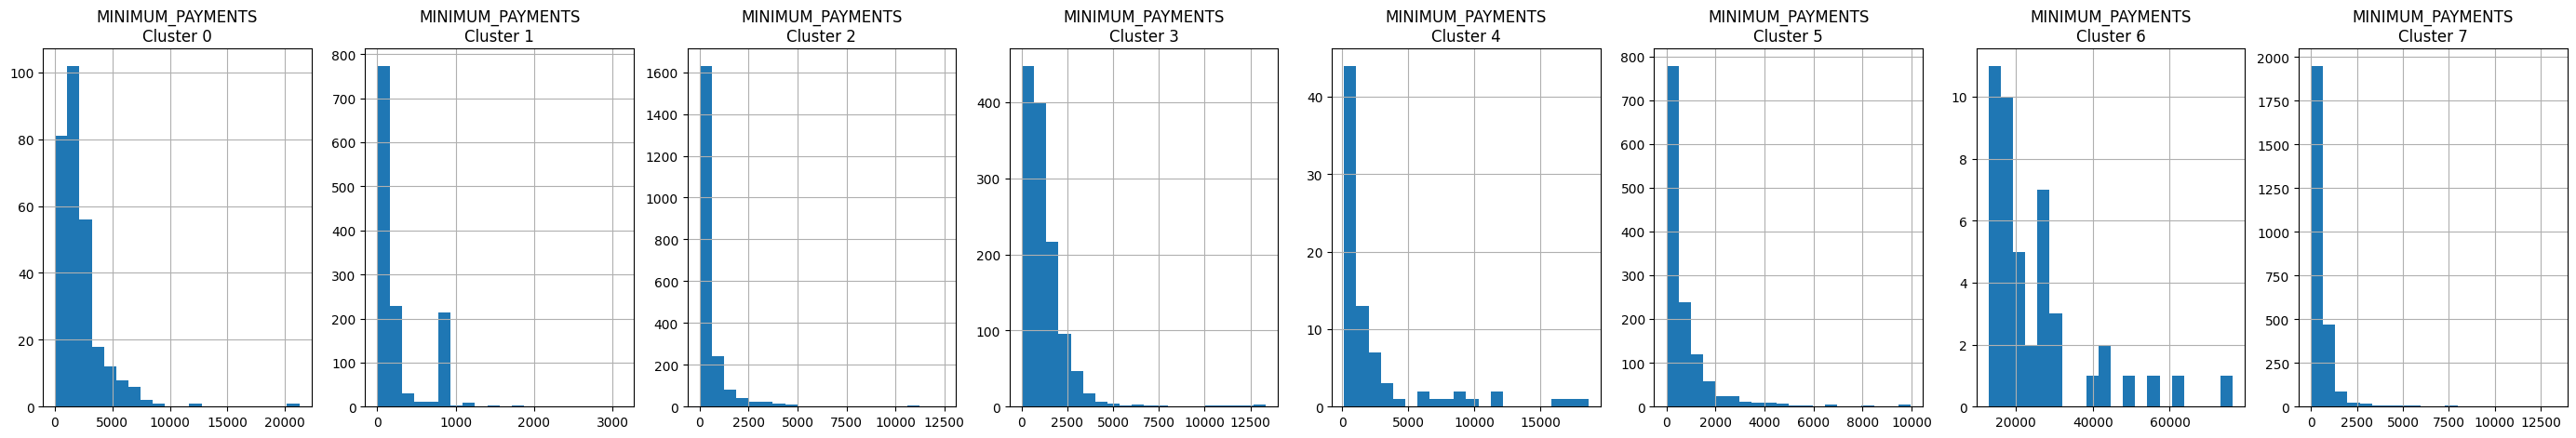

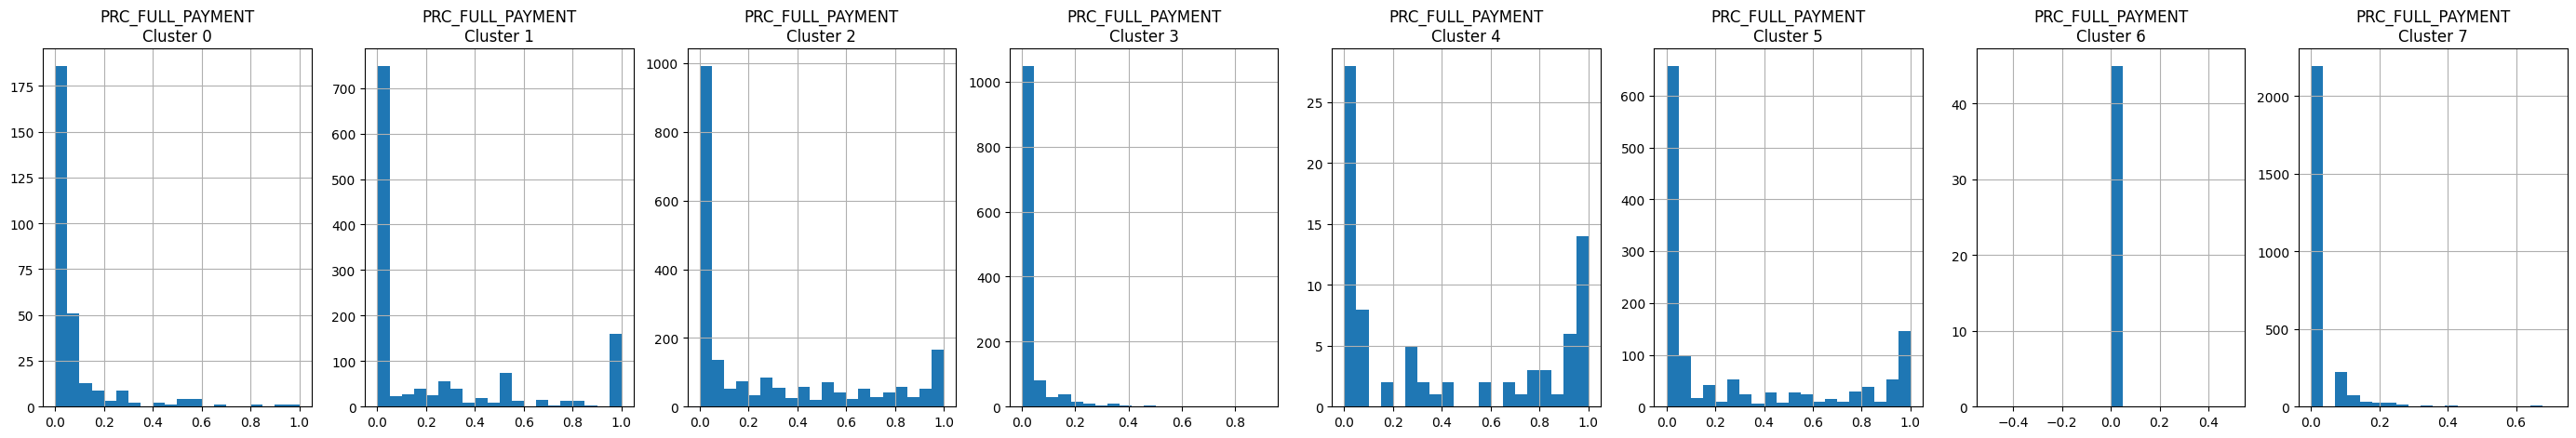

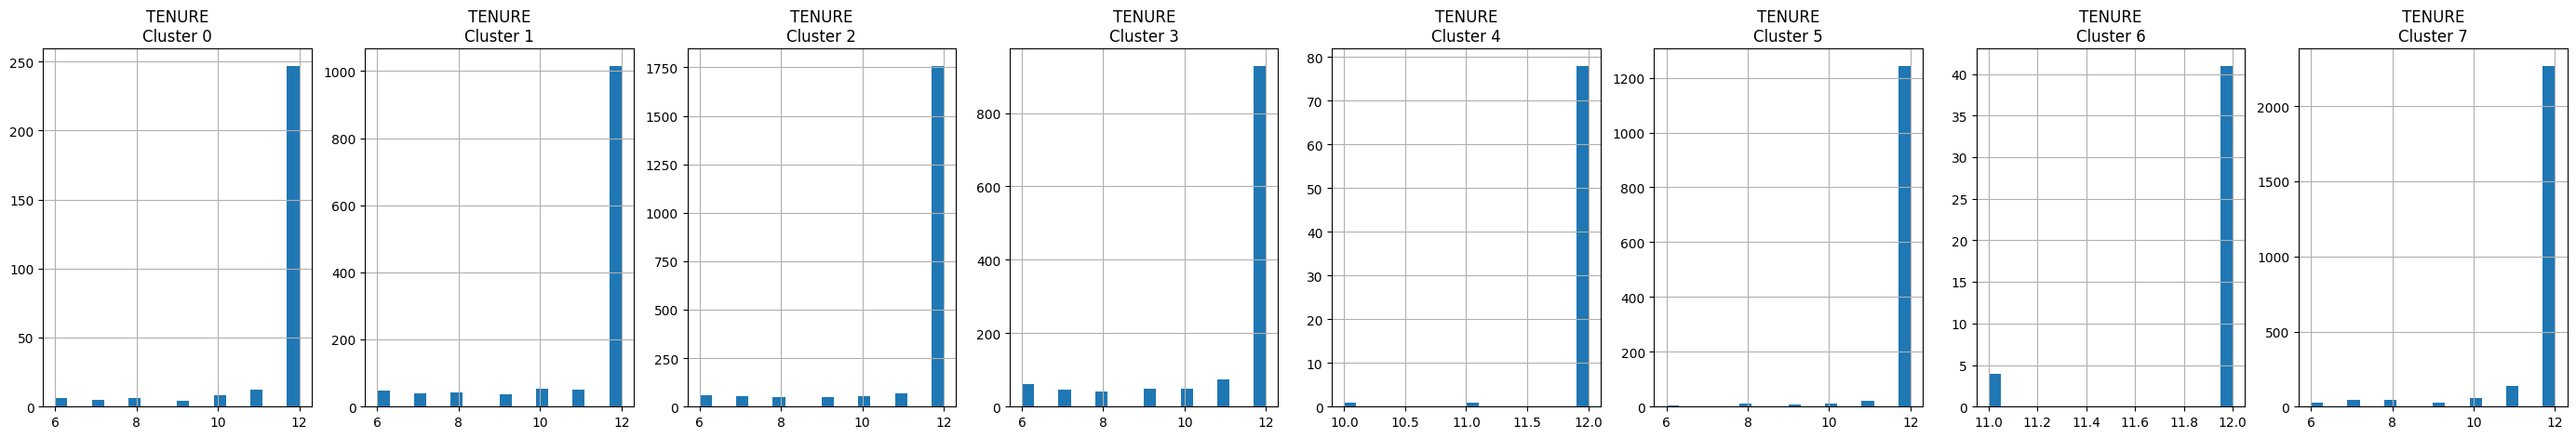

In [28]:
# Plot the histogram of various cluster.

for i in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j + 1)
        cluster = creditcard_df_cluster[creditcard_df_cluster["cluster"] == j]
        cluster[i].hist(bins=20)
        plt.title("{}\nCluster {}".format(i, j))

# Apply Principal Component Analysis and Visualise the results

In [29]:
# Obtain the principal components

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222024, -1.07645056],
       [-1.13829278,  2.5064747 ],
       [ 0.96968254, -0.38352495],
       ...,
       [-0.92620463, -1.81078475],
       [-2.33655232, -0.6579641 ],
       [-0.5564222 , -0.40046772]])

In [30]:
# Create a dataframe with the two components.

pca_df = pd.DataFrame(data=principal_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076451
1,-1.138293,2.506475
2,0.969683,-0.383525
3,-0.873626,0.043169
4,-1.599435,-0.688582


In [31]:
# Concatenate the clusters labels to the dataframe

pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076451,7
1,-1.138293,2.506475,3
2,0.969683,-0.383525,5
3,-0.873626,0.043169,7
4,-1.599435,-0.688582,7


/tmp/ipykernel_18304/222003107.py:4: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.scatterplot(


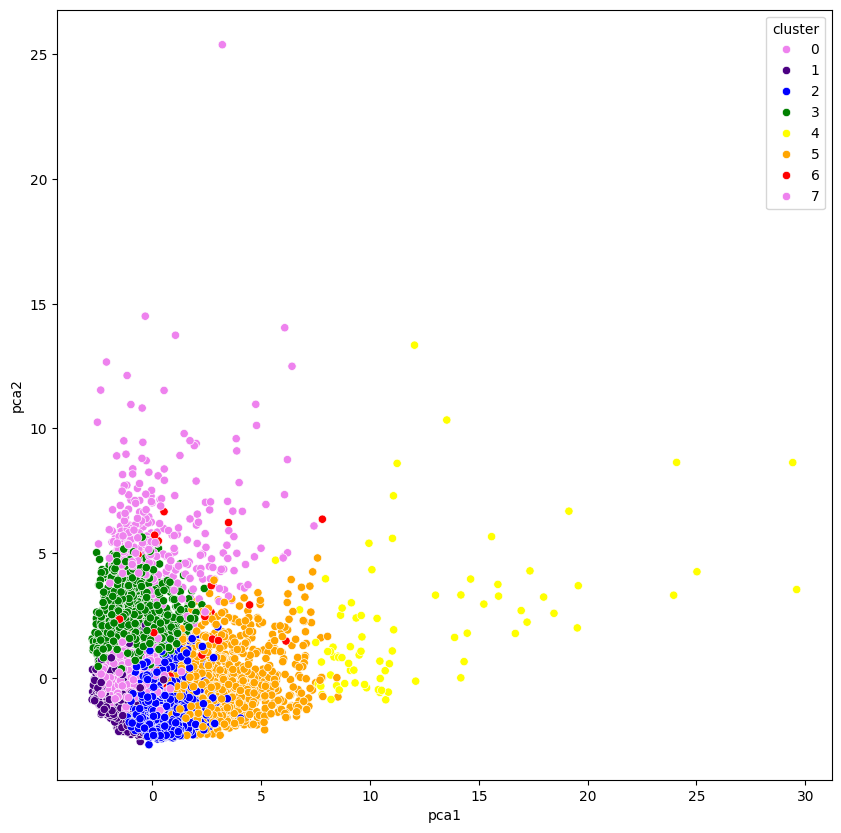

In [32]:
# Create a scatterplot to visualise the clusters.

plt.figure(figsize=(10, 10))
ax = sns.scatterplot(
    x="pca1",
    y="pca2",
    hue="cluster",
    data=pca_df,
    palette=["violet", "indigo", "blue", "green", "yellow", "orange", "red"],
)

Cluster 1 (violet) is condensed and is central to the rest of the clusters. Clusters 0 and 7 is very scaterred on different sides of the components.

# Apply Autoencoders (Perform Dimentionality Reduction using Autoencoders)

In [33]:
from tensorflow.keras.layers import (
    Input,
    Add,
    Dense,
    Activation,
    ZeroPadding2D,
    BatchNormalization,
    Flatten,
    Conv2D,
    AveragePooling2D,
    MaxPooling2D,
    Dropout,
)
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

2024-04-20 10:26:07.970930: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-20 10:26:07.974877: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 10:26:08.236417: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-20 10:26:10.475470: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 10:26:16.754668: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [34]:
input_df = Input(shape=(17,))

# Encoder
x = Dense(7, activation="relu")(input_df)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)
x = Dense(2000, activation="relu", kernel_initializer="glorot_uniform")(x)

# Bottleneck
encoded = Dense(10, activation="relu", kernel_initializer="glorot_uniform")(x)

x = Dense(2000, activation="relu", kernel_initializer="glorot_uniform")(encoded)
x = Dense(500, activation="relu", kernel_initializer="glorot_uniform")(x)

# Decoder
decoded = Dense(17, kernel_initializer="glorot_uniform")(x)

# Autoencoder
autoencoder = Model(input_df, decoded)

# Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer="adam", loss="mean_squared_error")

In [35]:
creditcard_df_scaled.shape

(8950, 17)

In [36]:
autoencoder.fit(
    creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose=1
)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - loss: 0.6798
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.3716
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.3009
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.2283
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.2029
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.2025
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.1613
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.1480
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.1432
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.1354
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.1326
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.1221
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.1099
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0993
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0975
Epoc

In [37]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2000)           │     1,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        20,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2000)           │        22,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │     1,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 17)             │         8,517 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,922,961 (26.41 MB)

 Trainable params: 2,307,653 (8.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,615,308 (17.61 MB)

In [38]:
pred = encoder.predict(creditcard_df_scaled)

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [39]:
pred.shape

(8950, 10)

In [40]:
pred

array([[1.1121713 , 1.7598405 , 0.5128342 , ..., 0.        , 0.        ,
        0.        ],
       [0.5923864 , 2.4919007 , 0.49925923, ..., 0.        , 0.        ,
        0.        ],
       [2.6025305 , 0.6076832 , 0.58668506, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [4.7314706 , 5.11598   , 3.285474  , ..., 0.        , 0.        ,
        0.        ],
       [2.685382  , 5.8819194 , 3.3235688 , ..., 0.        , 0.        ,
        0.        ],
       [3.3187108 , 4.3448567 , 3.7874143 , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [41]:
# optimal number of clusters

scores_2 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)

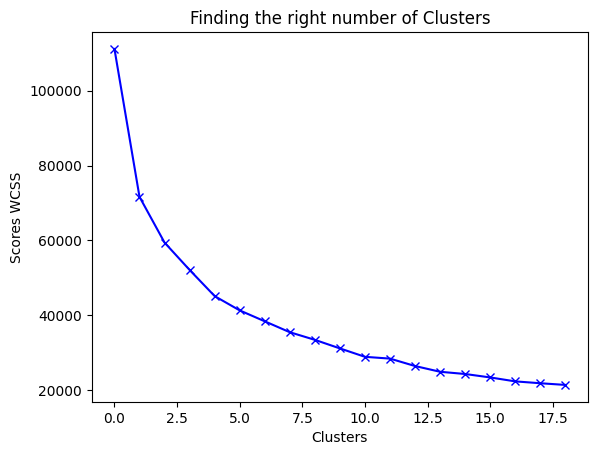

In [42]:
plt.plot(scores_2, "bx-")
plt.title("Finding the right number of Clusters")
plt.xlabel("Clusters")
plt.ylabel("Scores WCSS")
plt.show()

The autoencoder effectively lowered the WCSS error, indicating better cluster separation. While the initial WCSS plot suggested an elbow around 8 clusters, the curve now plateaus from the 4th cluster onward. This implies 4 clusters might be sufficient despite the presence of a few smaller ones.

/tmp/ipykernel_18304/3132624000.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, "bx-", color="r")
/tmp/ipykernel_18304/3132624000.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, "bx-", color="g")


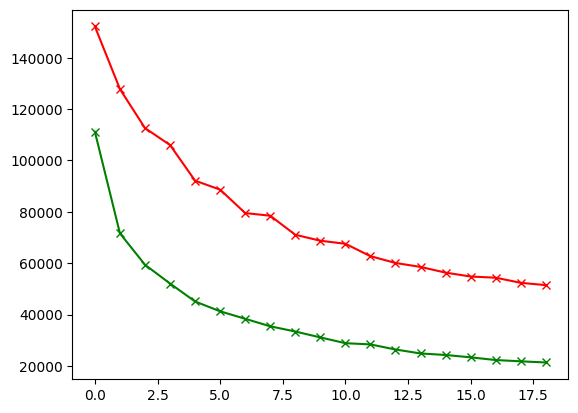

In [43]:
plt.plot(scores_1, "bx-", color="r")
plt.plot(scores_2, "bx-", color="g")

In [44]:
# Fitting KMeand with 4 clusters.

kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_

In [45]:
# Making data frame for our clusters.

df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({"cluster": labels})], axis=1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [49]:
# Obtain the principal components

pca = PCA(n_components=2)
principal_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data=principal_comp, columns=["pca1", "pca2"])
principal_comp

array([[-1.8506154 ,  0.15891749],
       [-0.33627224,  1.7141563 ],
       [ 0.24396838, -1.0852382 ],
       ...,
       [ 3.6709886 ,  1.6095595 ],
       [ 2.6010833 ,  3.1181736 ],
       [ 3.3010185 ,  2.2928503 ]], dtype=float32)

In [50]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster": labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.850615,0.158917,3
1,-0.336272,1.714156,3
2,0.243968,-1.085238,2
3,-0.679291,0.754867,3
4,-2.062423,0.102178,3


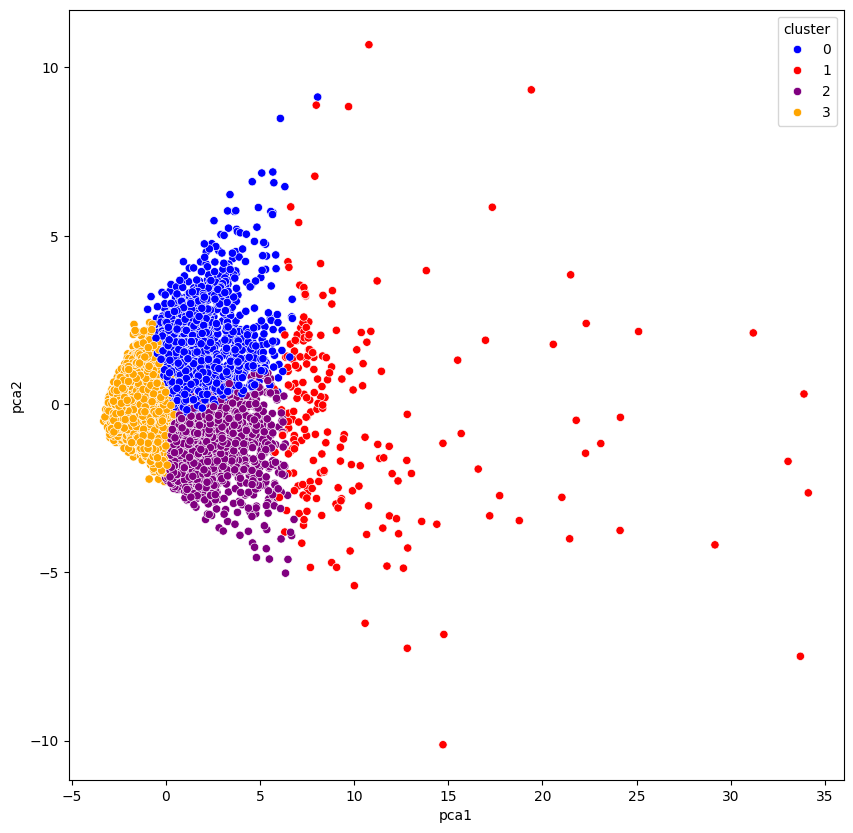

In [51]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(
    x="pca1",
    y="pca2",
    hue="cluster",
    data=pca_df,
    palette=[
        "blue",
        "red",
        "purple",
        "orange",
    ],
)

We'll prioritise analysing clusters 0 (Blue), 2 (Purple), and 3 (Orange) due to cluster 1 (Red) being sparse and spread across various component areas.

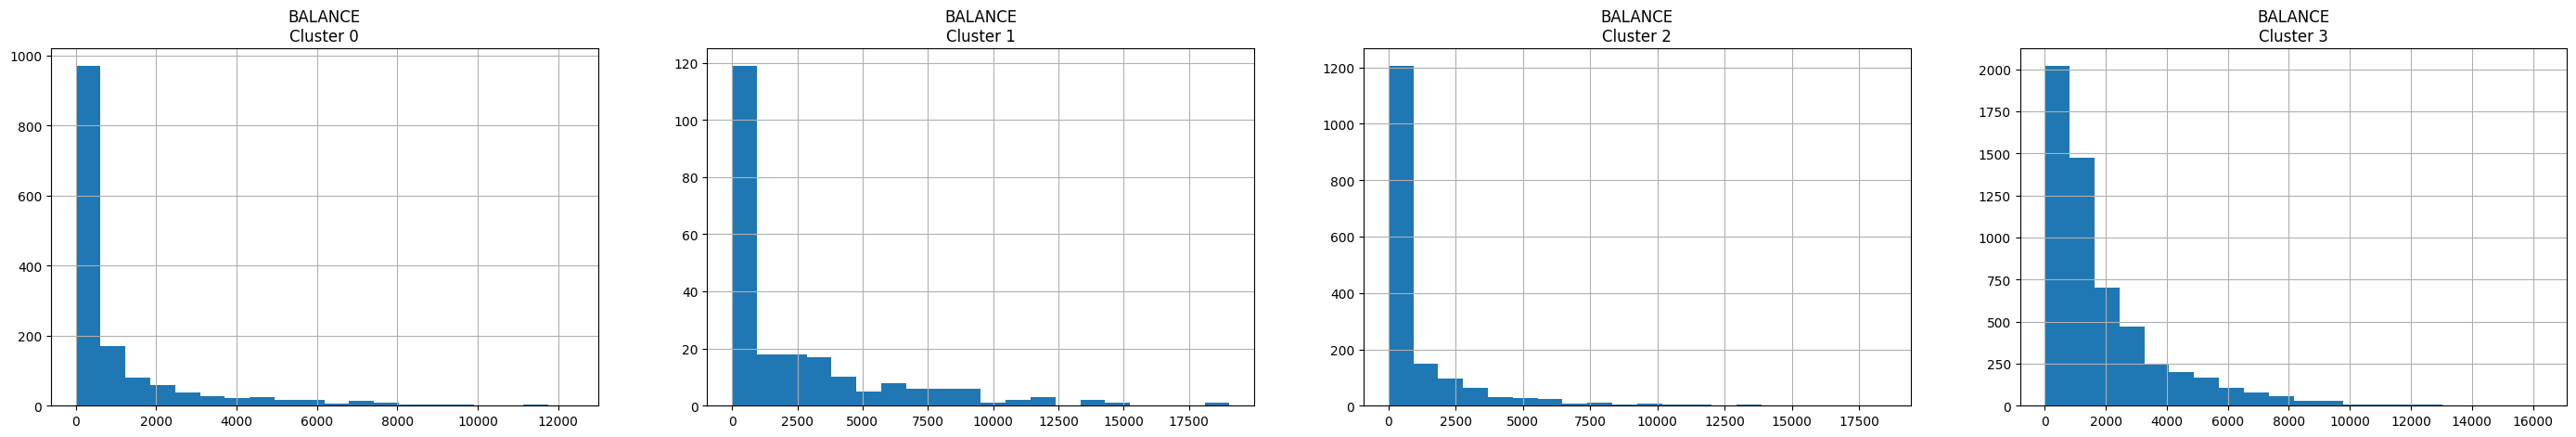

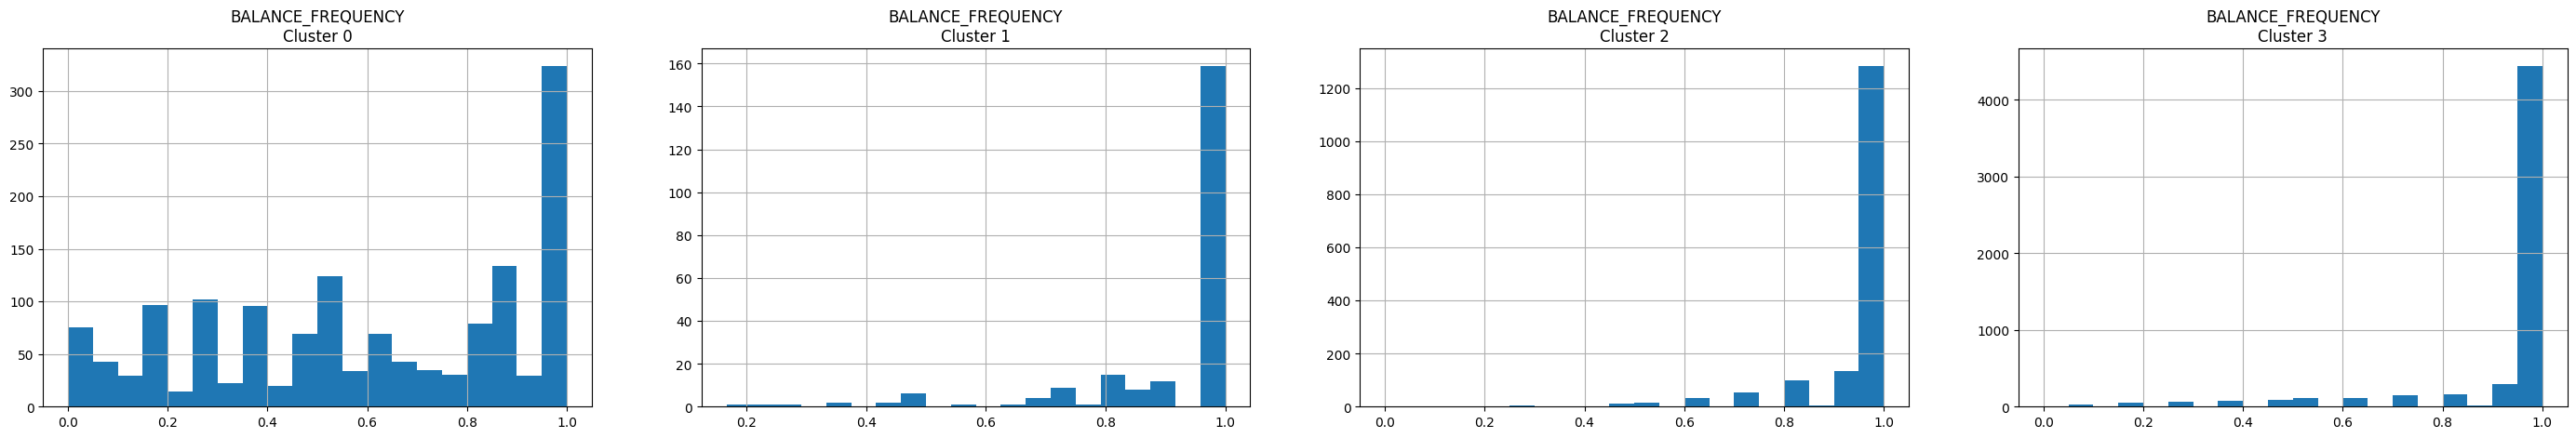

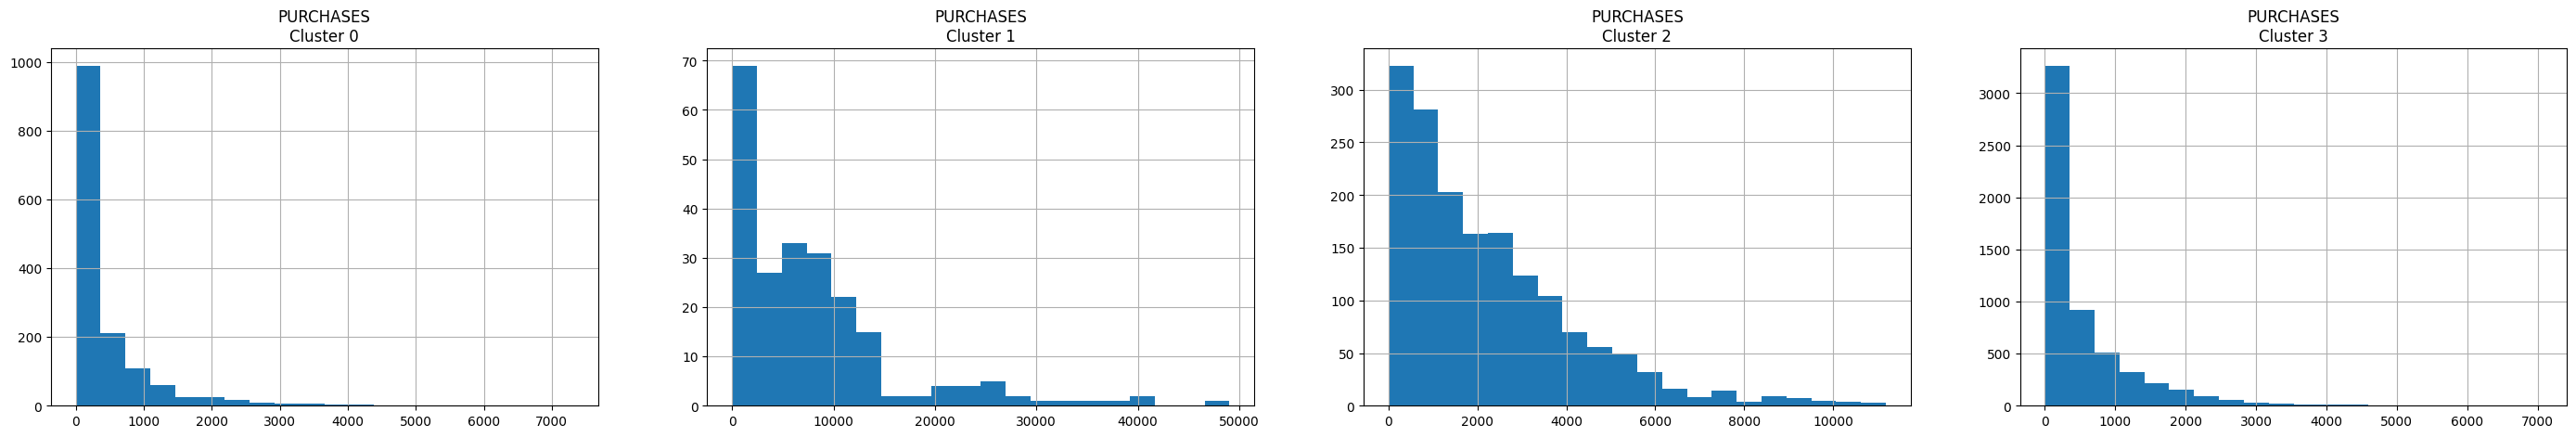

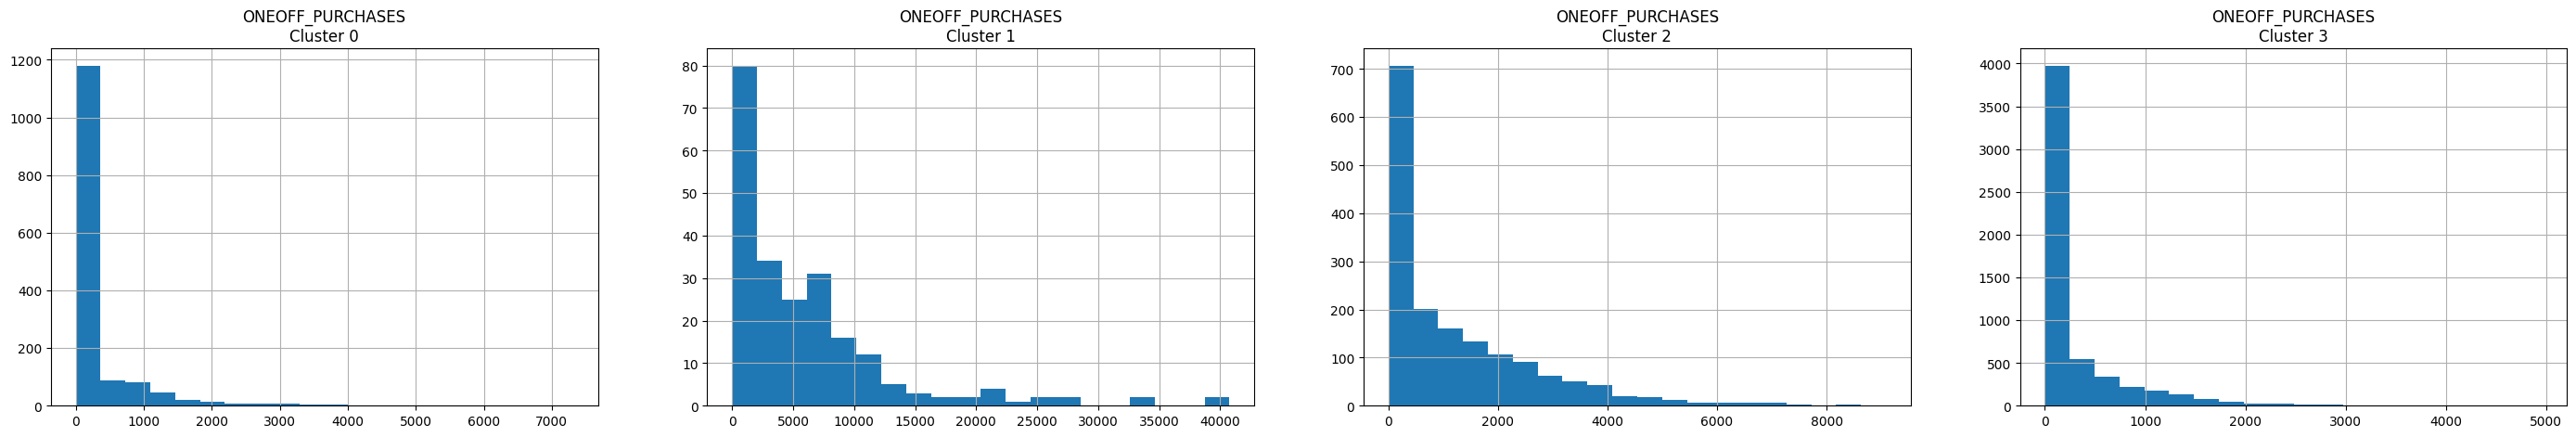

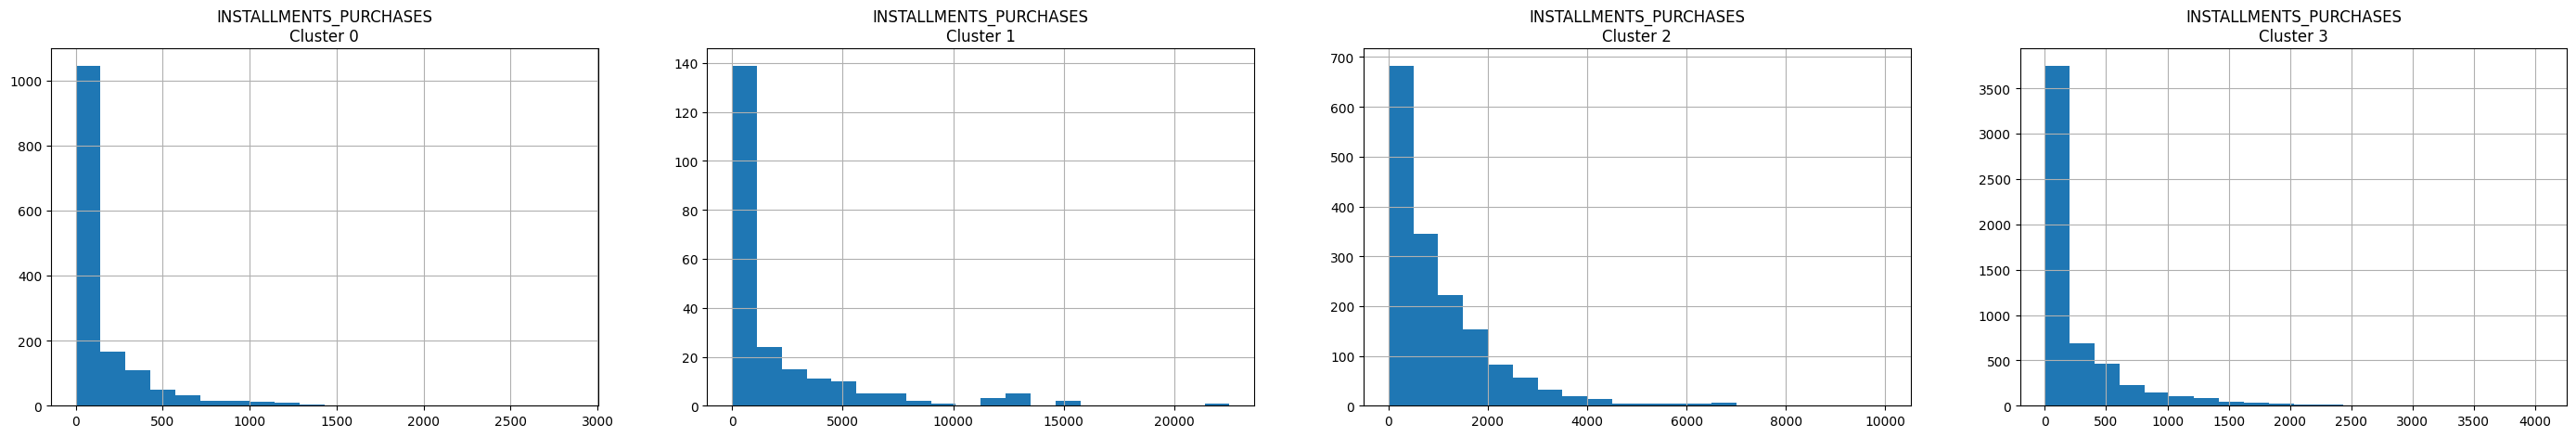

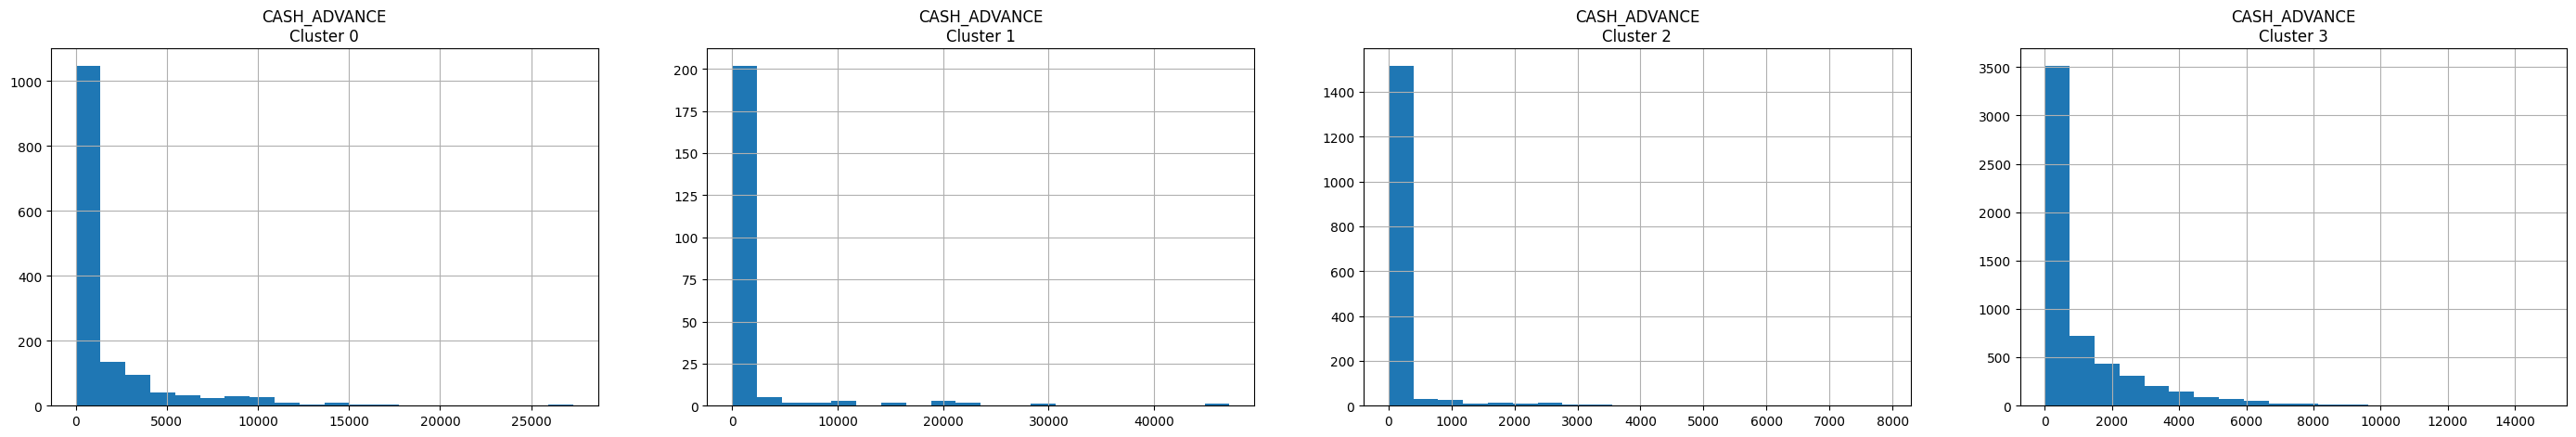

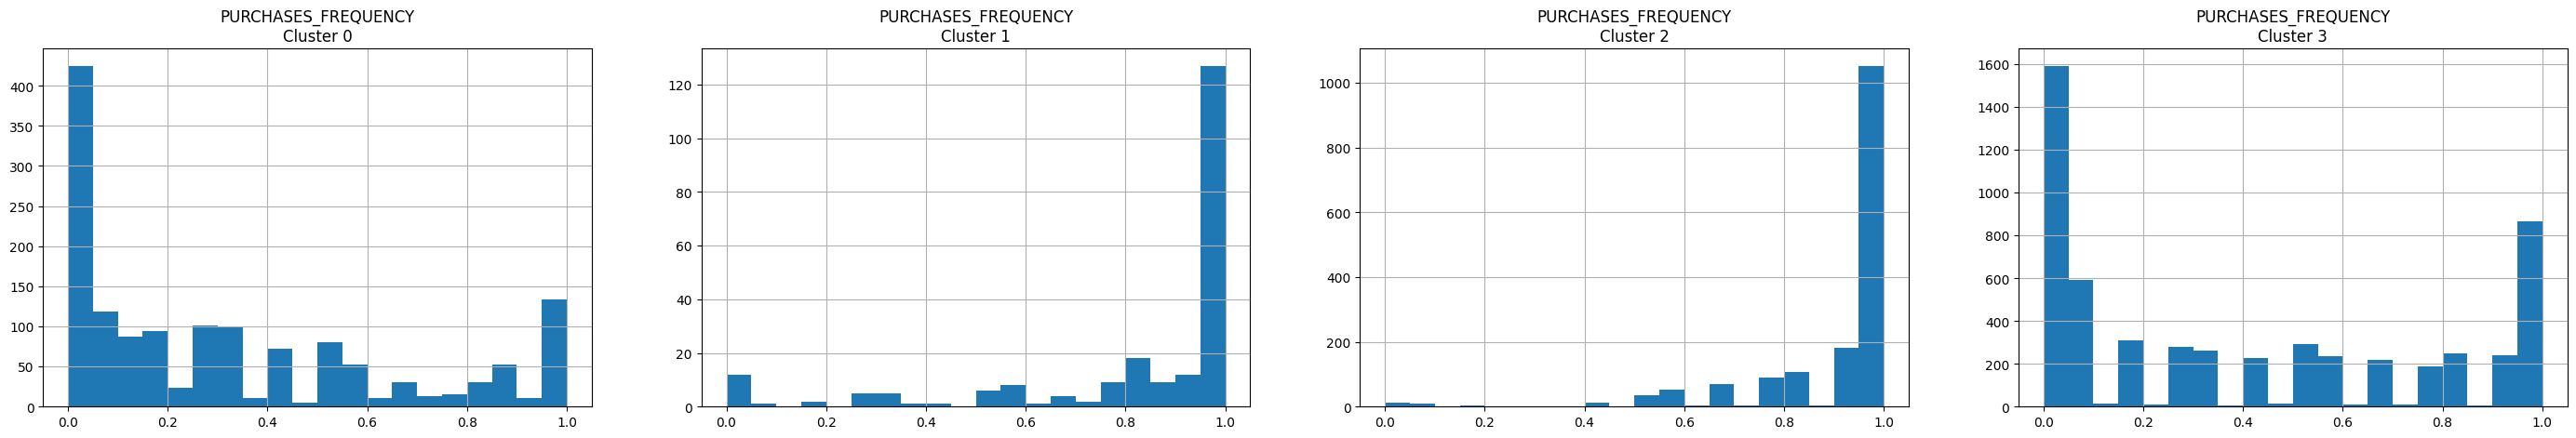

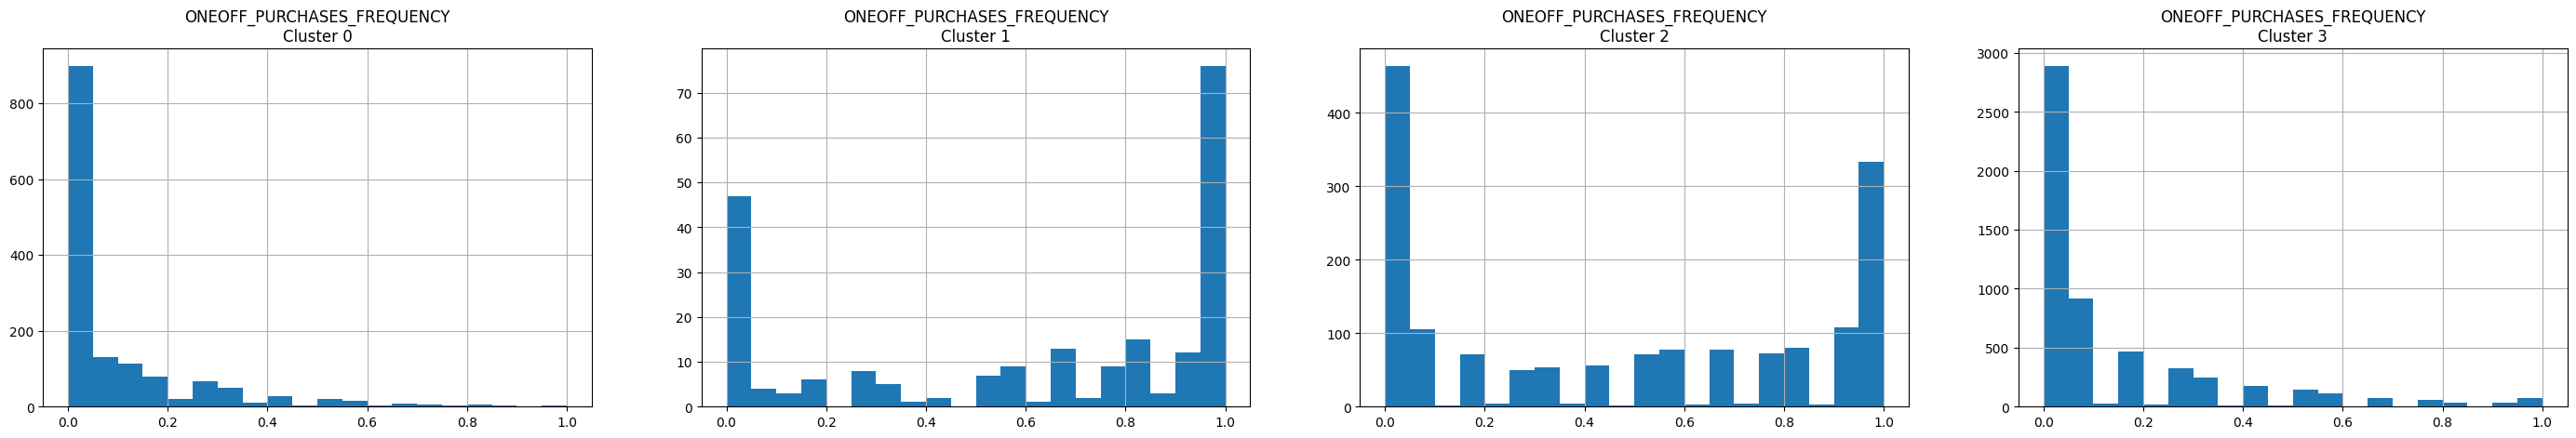

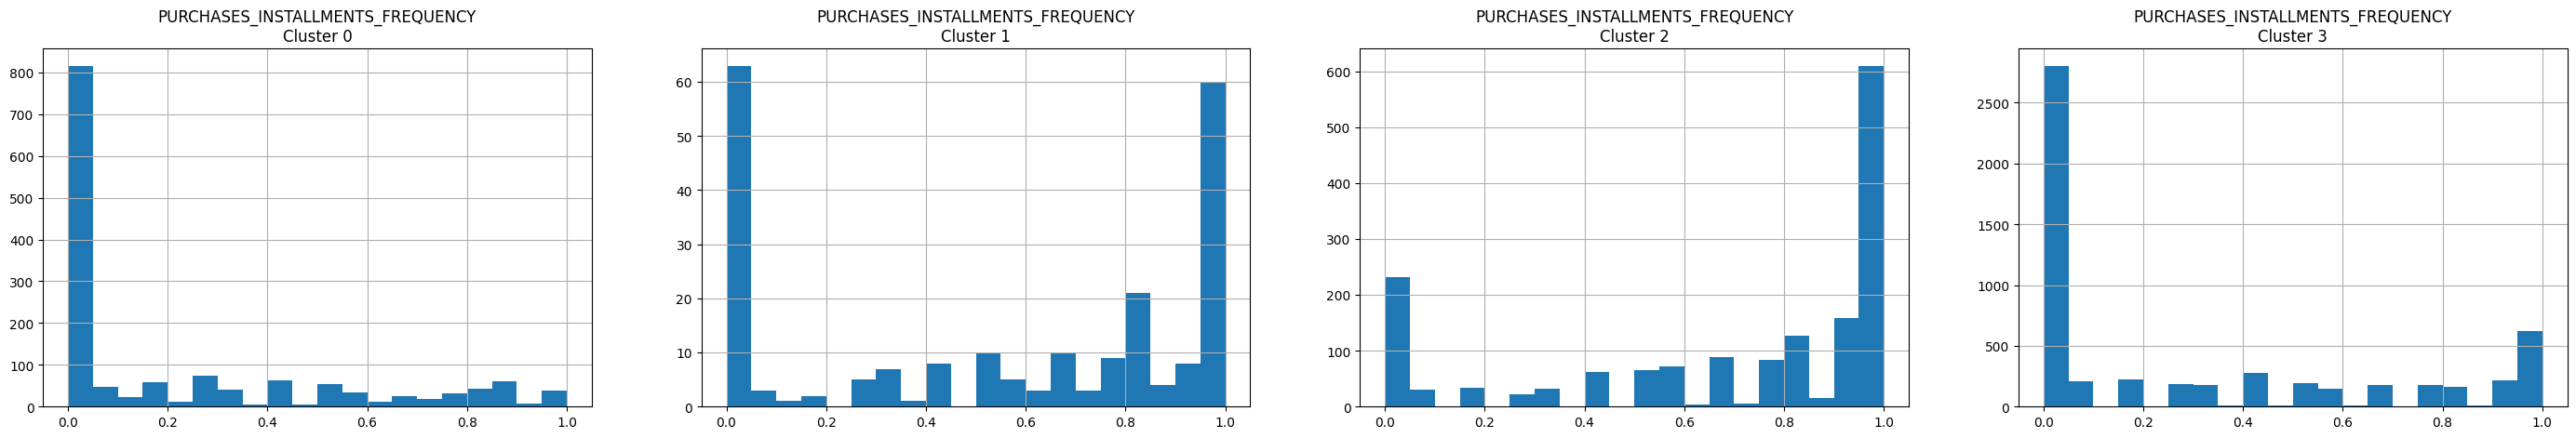

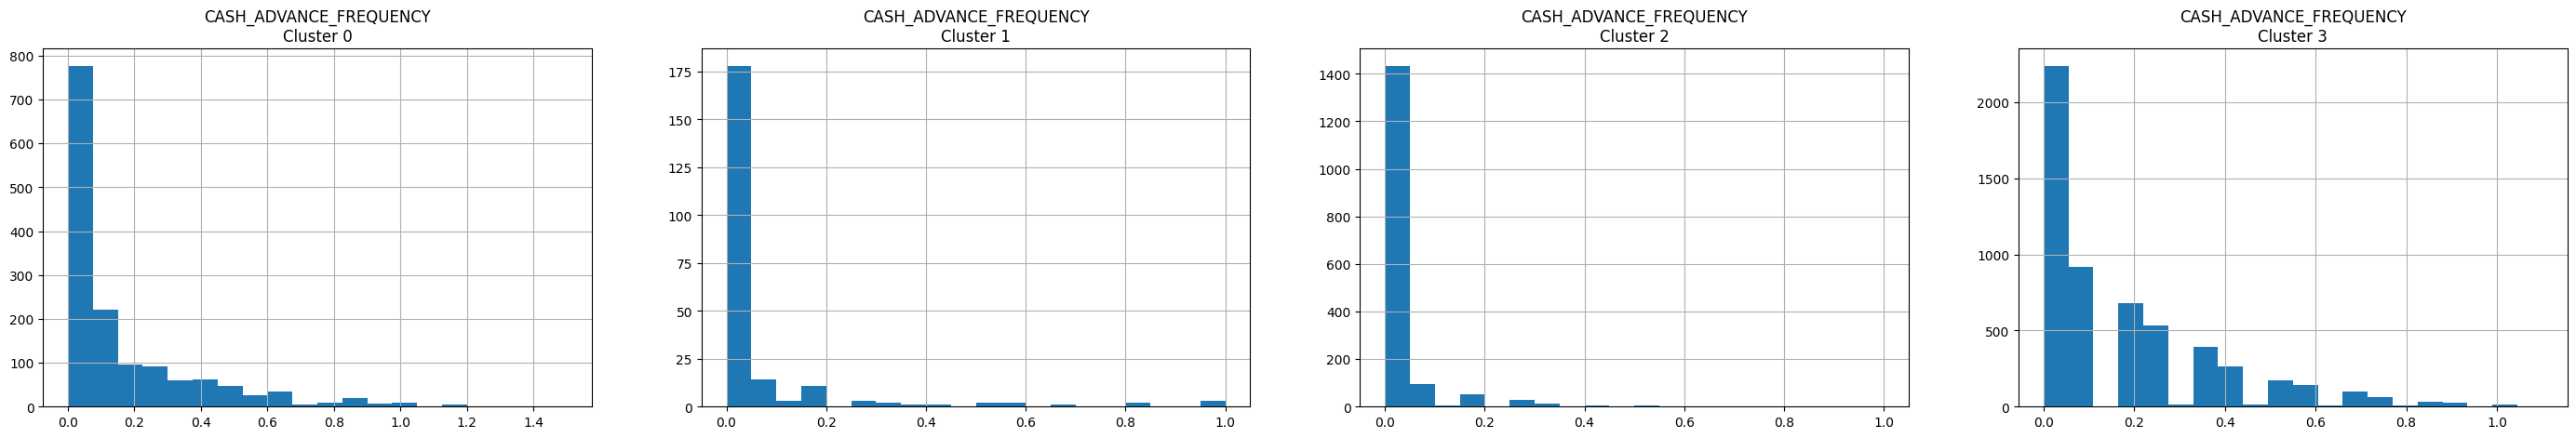

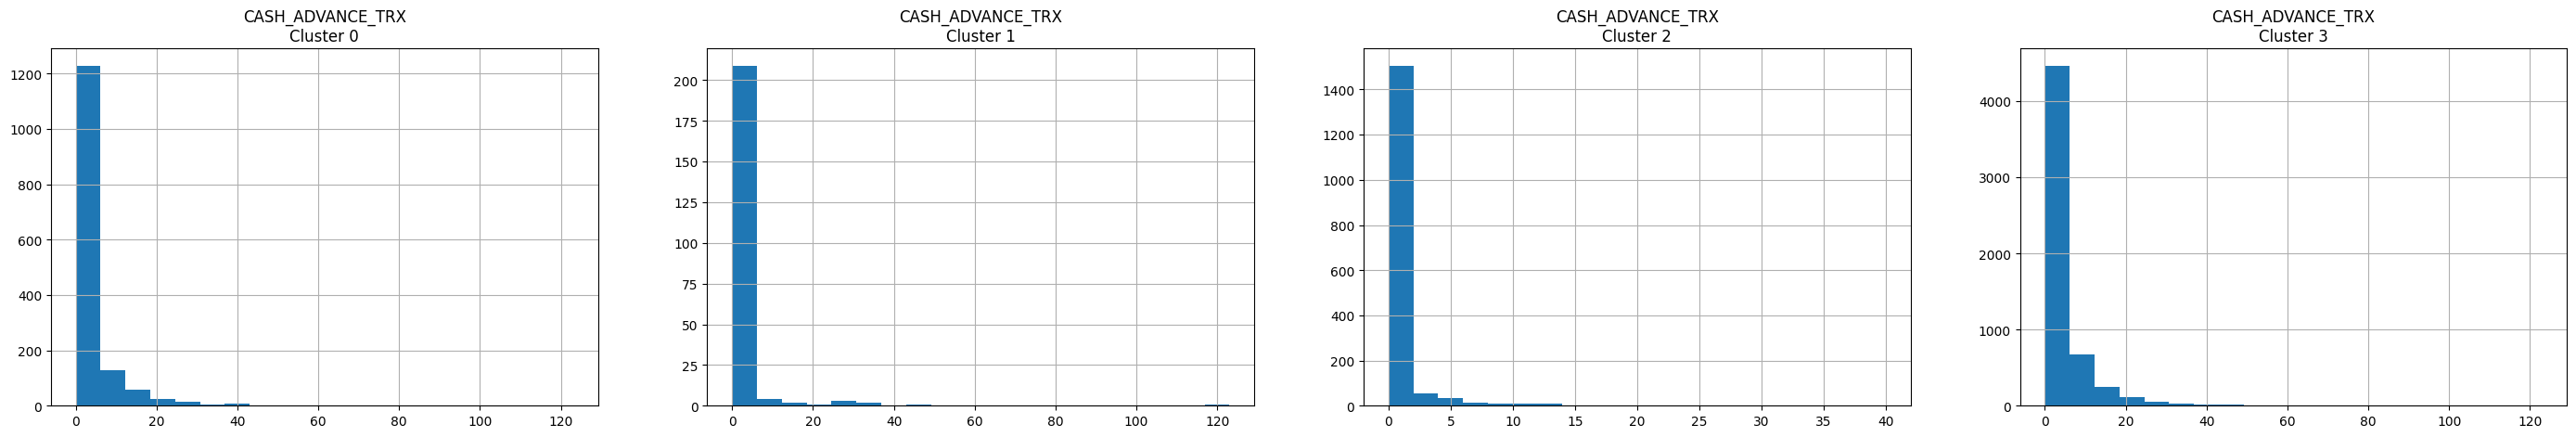

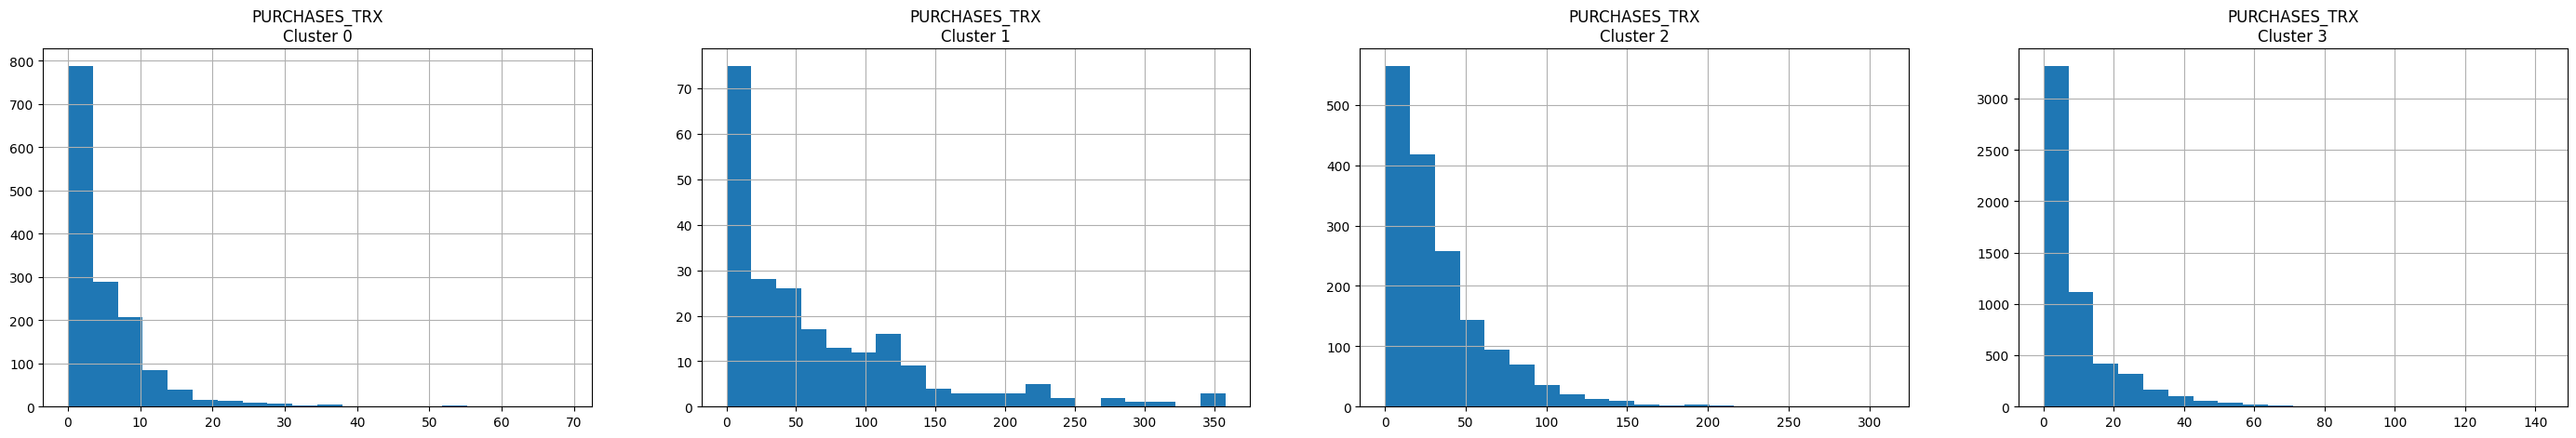

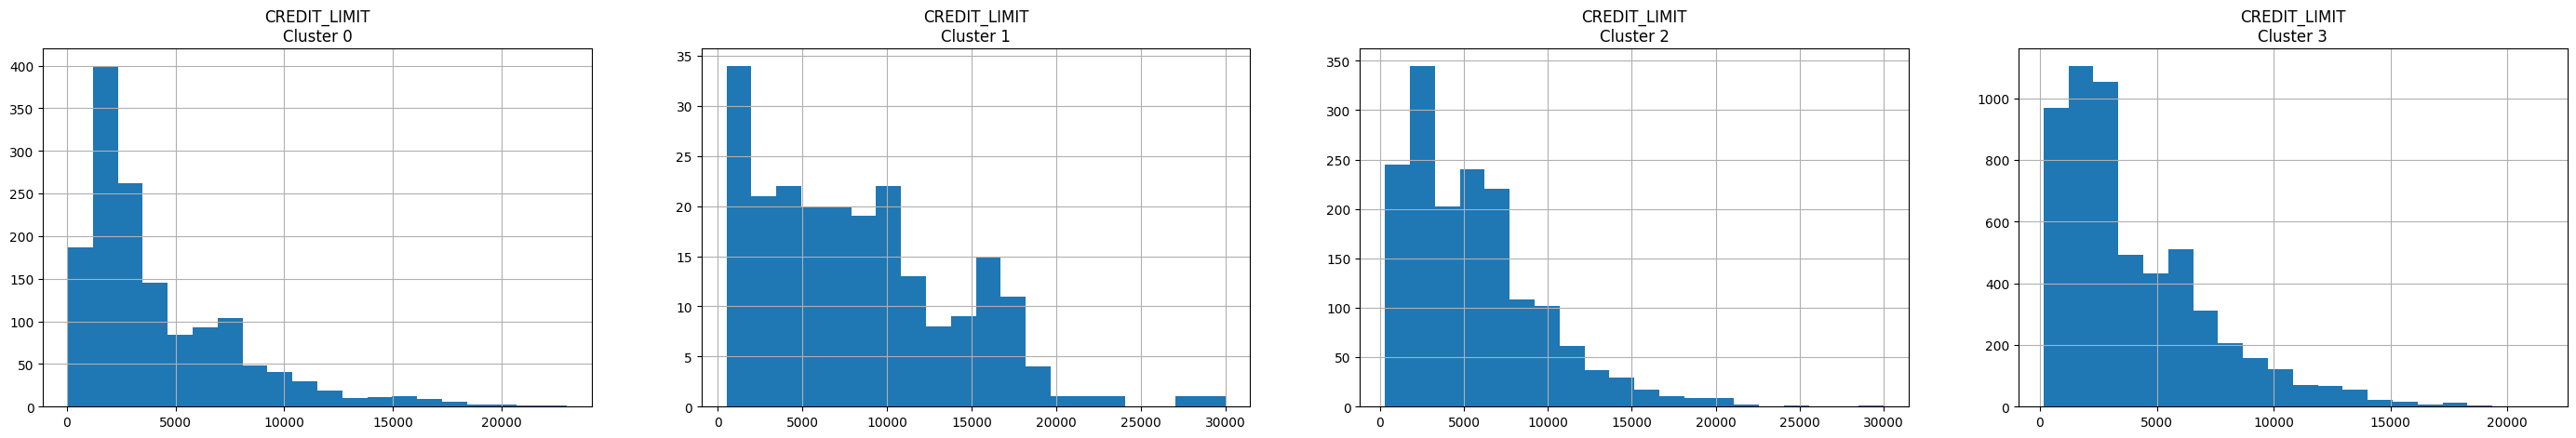

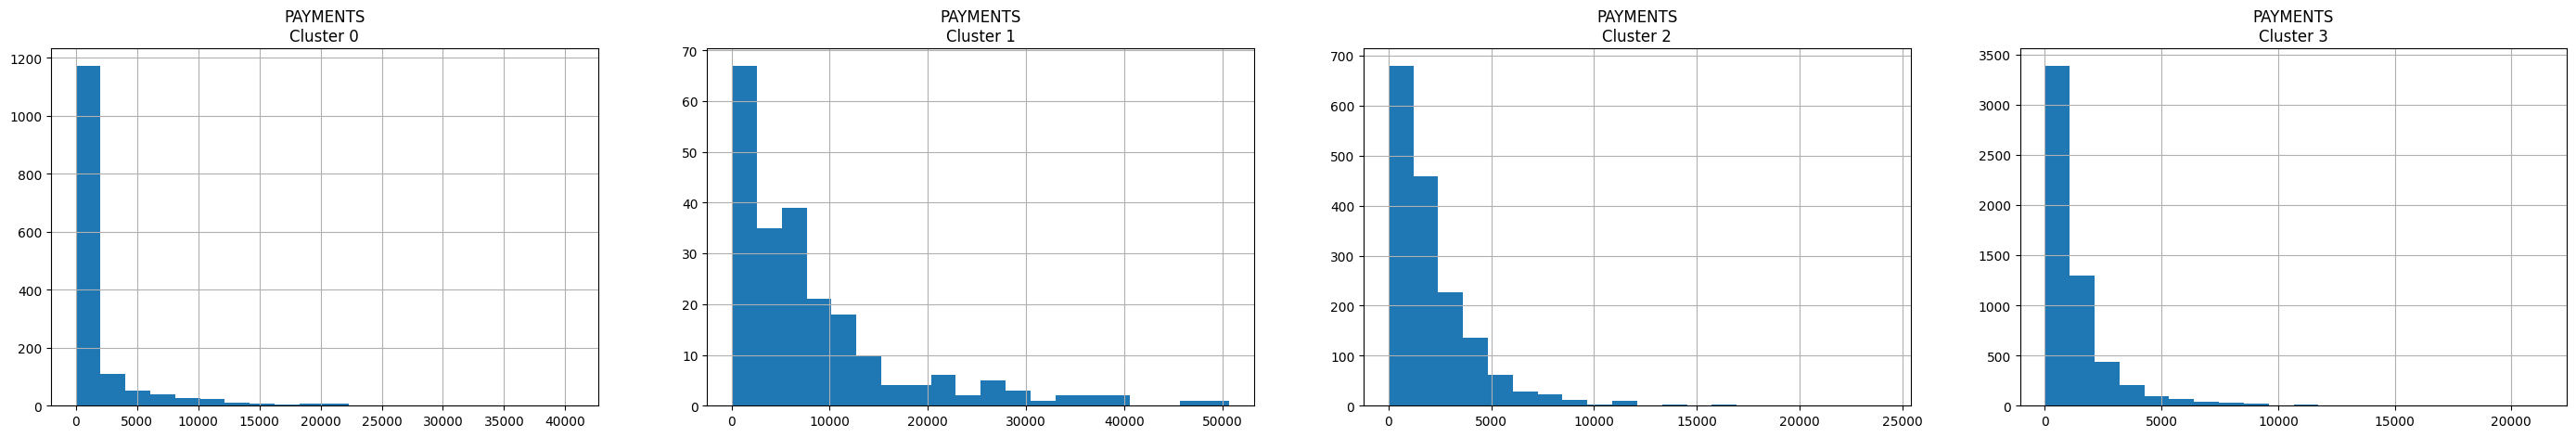

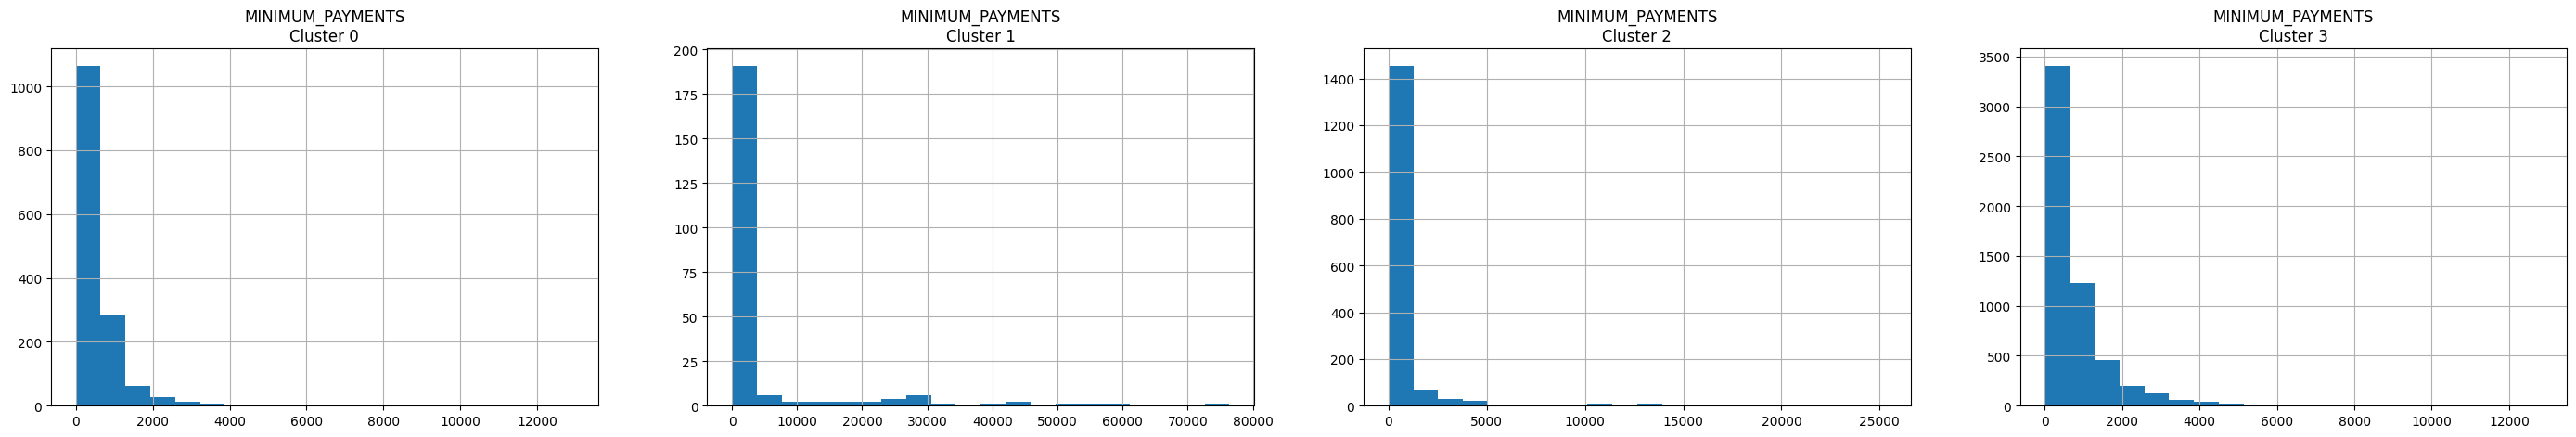

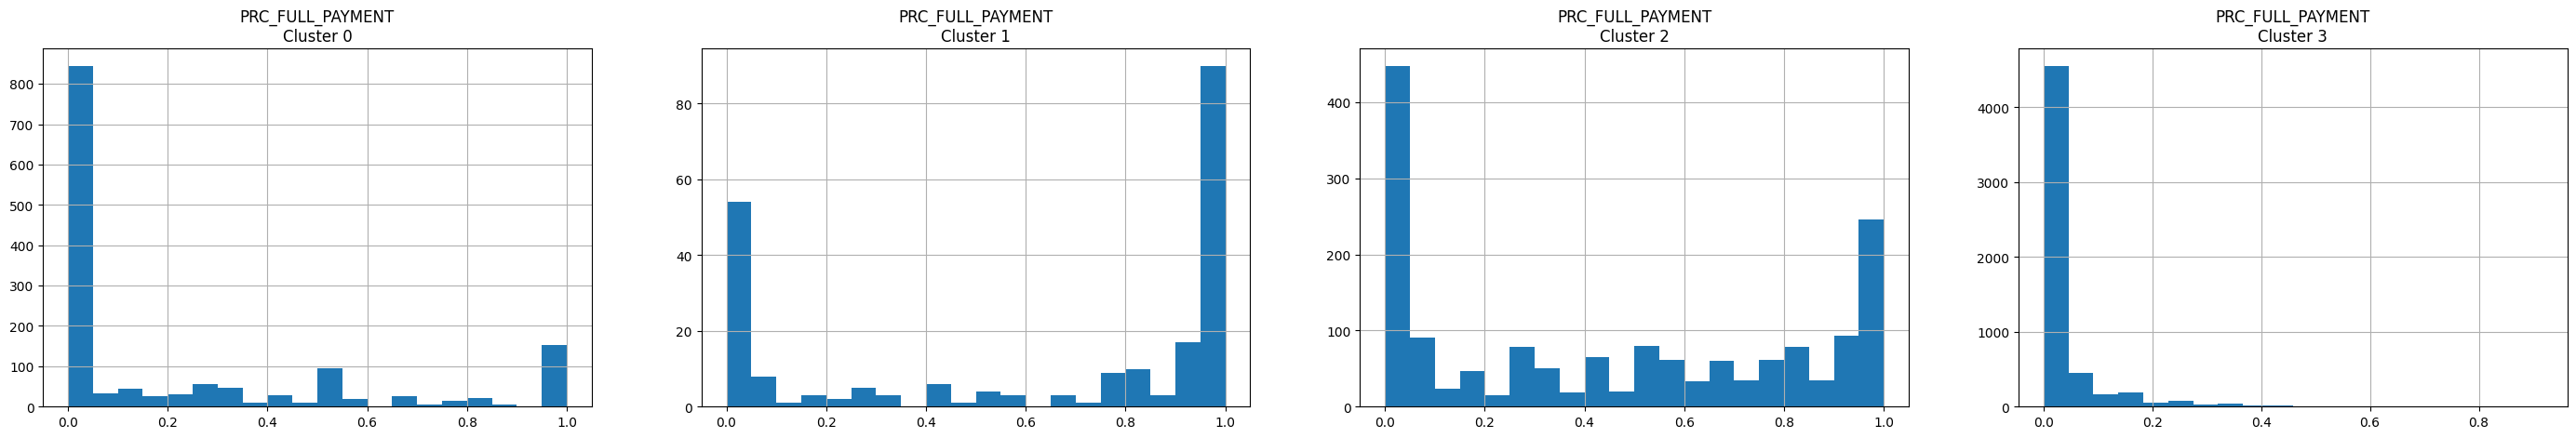

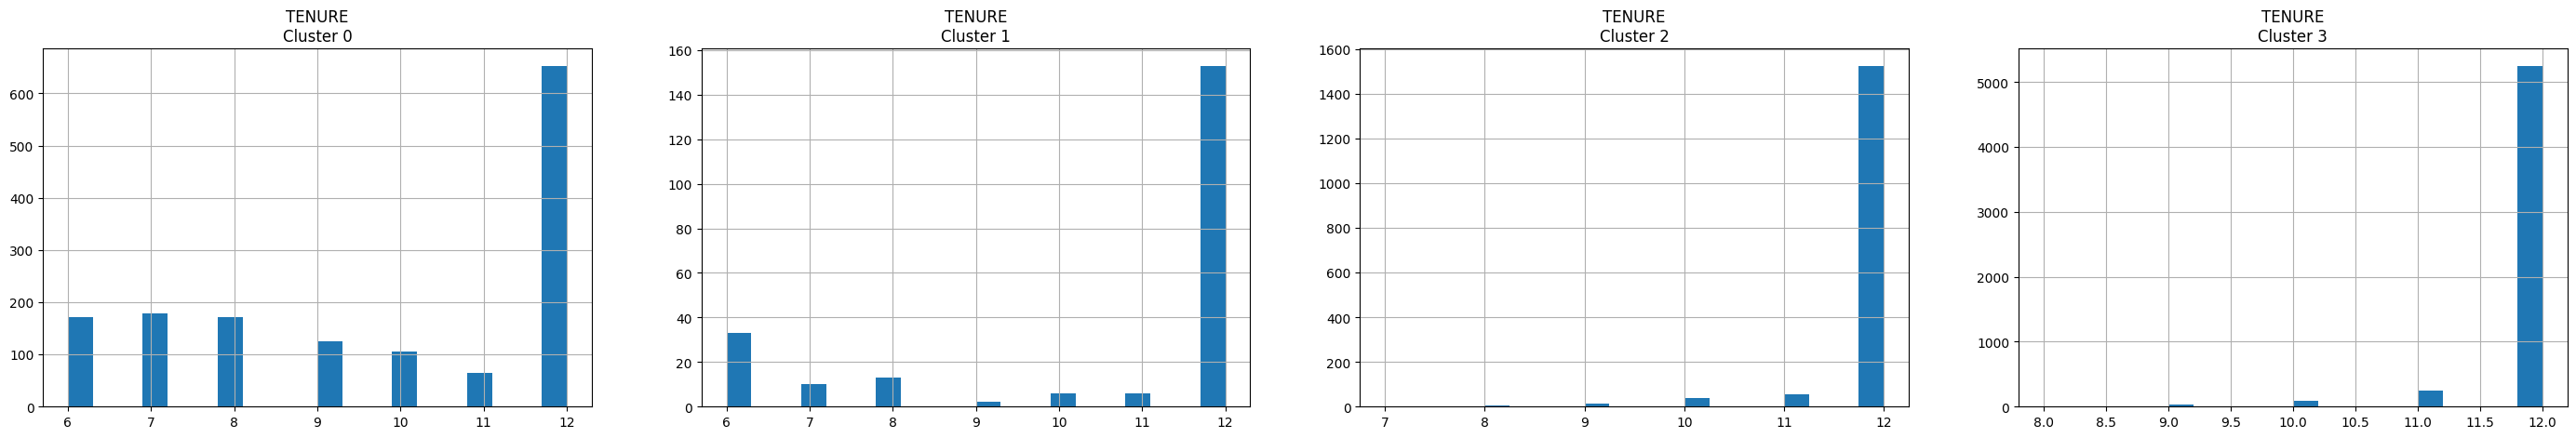

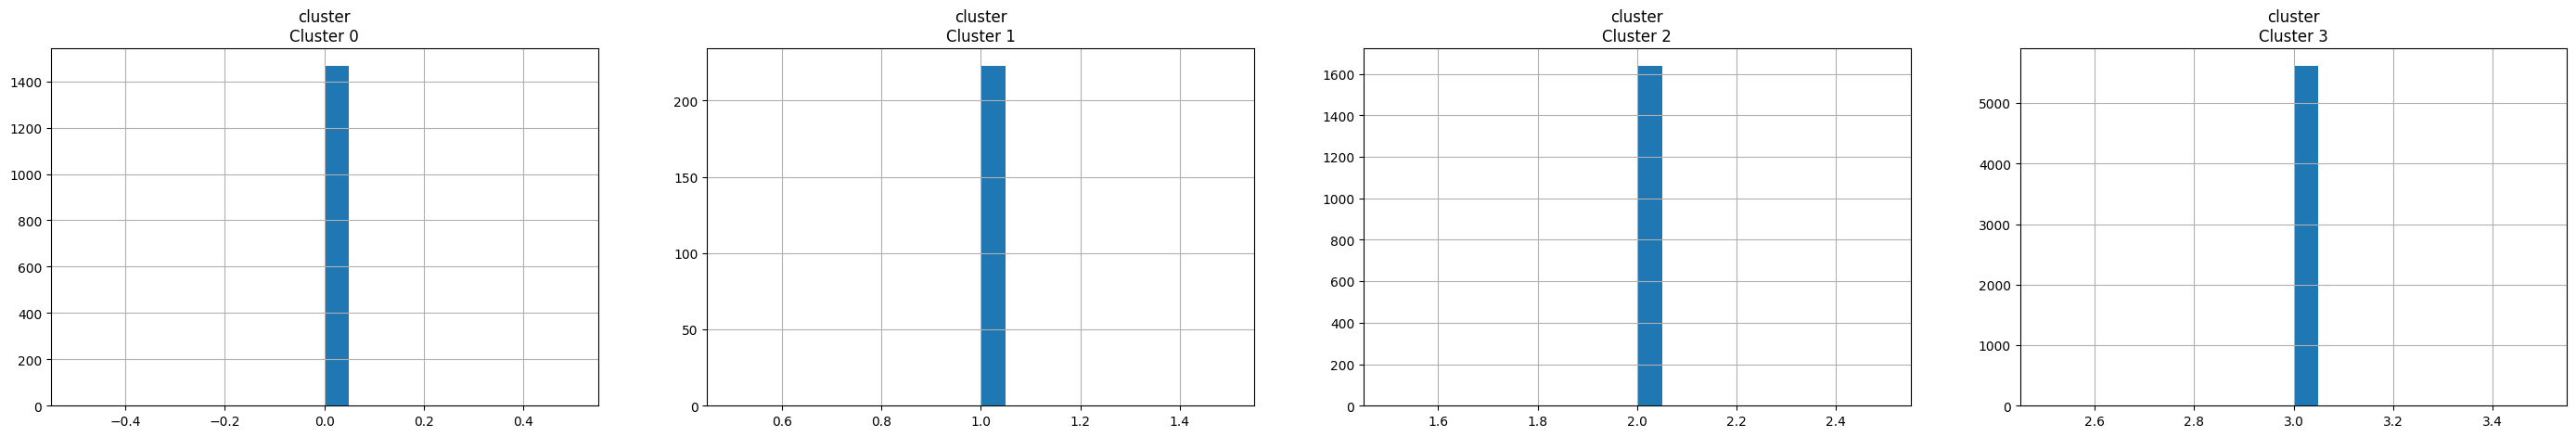

In [52]:
# Plot the histogram of various cluster.

for i in df_cluster_dr.columns:
    plt.figure(figsize=(35, 5))
    for j in range(4):
        plt.subplot(1, 4, j + 1)
        cluster = df_cluster_dr[df_cluster_dr["cluster"] == j]
        cluster[i].hist(bins=20)
        plt.title("{}\nCluster {}".format(i, j))


plt.show()

In [53]:
# Counting the number of customers in each cluster.

pca_df["cluster"].value_counts()

cluster
3    5619
2    1640
0    1468
1     223
Name: count, dtype: int64

Cluster 3 (5619 customers):
- Attributes: High Cash Advance frequency, High Purchase frequency, High Cash advance frequency.
- This cluster likely represents customers with high spending activity. They tend to use cash advances frequently, purchase items often, and potentially rely more on cash advances for purchases.
- The high cash advance usage could indicate potential creditworthiness concerns or a preference for using cash.


Cluster 2 (1640 customers):
- Attributes: High number of purchases (richer customers), High Installment purchases, High purchases_TRX, Highest one-off purchases and full payments.
- This cluster likely represents customers with higher spending habits and diverse payment preferences. 
- They make more purchases in general, utilise installment plans for larger purchases, and also engage in both one-off full payments and potentially recurring payments through "purchases_TRX". This suggests they are financially comfortable and use various payment methods based on purchase type.


Cluster 0 (1468 customers):
- Attributes: Low Balance Frequency (less active), Fluctuating tenure (ranging from 6-12 years, unlike others with mostly 12 years).
- This cluster likely represents customers who are less active on the platform. They might have lower purchase frequencies and potentially check their account balance less often.
- Their spending habits seem to fluctuate, and their tenures might also vary compared to other clusters where it's mostly 12 years but in this case it's ranging from 6-12 years.

Cluster 1: 223 (Excluded from further analysis due to being scattered)